Inspi:  test

- https://www.kaggle.com/code/hasibalmuzdadid/brain-stroke-analysis-accuracy-96-03/notebook#Basic-Exploration
- https://www.kaggle.com/code/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy
- Emilies
- Exercise 3 fra BDM – tager udgangspunkt i brain stroke datasæt

# 1. Busines Understanding

### The business problem

The dataset used in this project is related to healthcare, as it contains data regarding stroke, which is is a critical life-threatening medical condition.

Stroke is according to the World Health Organization (WHO) the 2nd leading cause of death on a global plan. This accounts for approximately 11% of total deaths being caused by strokes. 

From both a societal and business perspective, it is relevant to address this problem. From a societal perspective, the health of patients can be improved. From a business perspective, it can redue costs related to hospitalization and treatment of hospitals. 

The dataset applied to this project is used to predict whether a patient is likely to encounter a stroke or not. The prediction is based on a variety of input parameters, which provides relevant information characterizing the individual patient. 


### Understanding of the context

Initially it is important to gather insights regarding the context of the problem we are scoping. 

- Information on brain strokes
https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset?resource=download

# 2. Data Understanding

Initially, we conduct an exploratory data analysis to get insights into the dataset.

### Importing libraries and packages

In [235]:
# Importing packages and libraries

# Data handling
import pandas as pd #Used
import numpy as np #Used
import imblearn #Used
import matplotlib.pyplot as plt 
import seaborn as sns

# Using scikit-learn to training ("fitting") pre-built models/algorithms ("estimators") to some data so it can be used to make predictions on new data.
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# For resampling and balancing imbalanced datasets
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #Used
from sklearn.tree import plot_tree #Use
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix, classification_report #Used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

# Evaluating classifiers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # for displaying a pretty confusion matrix


## OBS dont import libraries we dont use
# comment - exercise 8

### Importing dataset

In [236]:
# Importing the csv file containing the dataset 
df = pd.read_csv('strokes.csv', sep=',')

### Attribute Information

To get insight to the dataset, we look at the attributes and their values.

The dataset has 12 attributes, where one of them is the target value (`stroke`)

- **id:** Unique identifier

- **gender:** Indicating the gender of the patient - "Male", "Female" or "Other"

- **age:** Age of the patient

- **hypertension:** 0 (the patient doesn't have hypertension), 1 (the patient has hypertension)

- **heart_disease:** 0  (the patient doesn't have any heart diseases), 1 (the patient has a heart disease)

- **ever_married:** Indicating if the patient has ever been married - "No" (the patient has not been married) "Yes"

- **work_type:** Indicating what type of work the patient has - "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

- **Residence_type:** Indicating the type of setting where the patient lives - "Rural" or "Urban"
    - *Rural:* Indicates that the location is generally out in the country, outside of cities, typically not densely populated.
    - *Urban:* Indicates that the location is in the city - a location that is densely populated.
    
- **avg_glucose_level:** average glucose level in blood

- **bmi:** Body Mass Index

- **smoking_status:** Indicates the smoking status of the patient - "formerly smoked", "never smoked", "smokes" or "Unknown"*
    - *Note:* "Unknown" in `smoking_status` means that the information is unavailable for this patient.

- **stroke:** The target value, indicating whether the patient has had a stroke or not - 1 (the patient had a stroke) or 0 (the patient hsa not had a stroke)

Reference: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


### Dataset insights

In [237]:
# Shape of the dataset - Number of rows and columns
df.shape

(5110, 12)

**Insights:**
- The dataset has 5110 rows and 12 columns (attributes)

In [238]:
# Display top 5 instances of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- The dataset contains 5110 instances with 11 features and 1 output variable 
- We will drop the **id**-column later on, as it doesn't affect the prediction of the target value.

In [239]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Insights:**
- The dataset contains both *numerical* and *categorical* variables
    - 5 numerical features: age, hypertension, heart_disease, avg_glucose_level, bmi, stroke
    - 4 categorical features: gender, ever_married, work_type, Residence_type, smoking_status
- The *categorical* features will need to be encoded to numerical values, which will be done later on.
- The *bmi*-column contains null-values, which we will look further into

In [240]:
# Analyze summary statistics - numeric columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [241]:
# Analyze summary statistics - categorical (object) columns
df.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#### Duplicates

In [242]:
# Checking for duplicate values
df.duplicated().sum()

0

**Insights:**
- There is 0 duplciates among the total 5110 entries in the dataset

#### Null-values

In [243]:
# Checking for null values - amount and percentage of missing values for each attribute
def missing_values (df):
    number_missing = df.isnull().sum()
    percentage_missing = round(df.isnull().mean()*100,2)
    values_missing = pd.concat([number_missing, percentage_missing], axis=1, keys=['Missing Values (amount)', 'Missing Values (%)'])
    return values_missing

missing_values(df)

,Missing Values (amount),Missing Values (%)
id,0,0.00
gender,0,0.00
age,0,0.00
hypertension,0,0.00
heart_disease,0,0.00
ever_married,0,0.00
work_type,0,0.00
Residence_type,0,0.00
avg_glucose_level,0,0.00
bmi,201,3.93


**Insights:**
- There are 201 null-values in the *bmi*-column, meaning that there are missing values. This corresponds to approx. 4% missing values within the *bmi*-column.
- The rows with missing valus will be dropped later on.


### Target Variable

In [244]:
# We take a look at the values of the target variable (y)
y = df['stroke']

# sum(y)/len(y)*100

# Percentage and number of patients that had a stroke:
print(f'Percentage of patients that had a stroke: {round(y.value_counts(normalize=True)[1]*100,2)}% ({y.value_counts()[1]} patients) ')
      
# Percentage of patient that had a stroke:
print(f'Percentage of patients that did not have a stroke: {round(y.value_counts(normalize=True)[0]*100,2)}% ({y.value_counts()[0]} patients)')

Percentage of patients that had a stroke: 4.87% (249 patients) 
Percentage of patients that did not have a stroke: 95.13% (4861 patients)


**Insights:**
- Approx. 5% instances of the target variable is 1 (*stroke*) --> 249 of the patients did have a stroke
- Approx. 95% instances of the target variable is 0 (*no stroke*) --> 4861 of the patients did not have a stroke 


    --> This indicates that the dataset contains imbalanced data, as the target class labels are unequally distributed

Text(0.5, 1.0, 'Stroke')

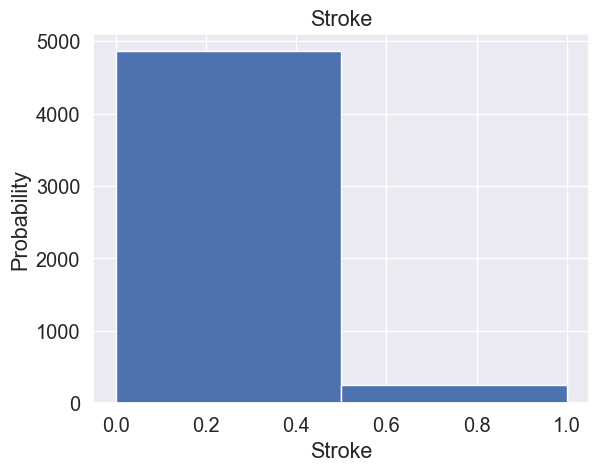

In [245]:


plt.hist(df['stroke'], bins=2)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Stroke');
plt.title('Stroke')

Exercise from lecture 6:
"To get more inisght about our data is good also to plot the disrtibution of certain attributes of interest. You can plot the histogram of Spending_Score attribute by selecting that column from the data frame and adding .hist(). Do the same for the Annual_Income column. How are their distributions?"

Lecture 6 exercise: Another useful way to get insight about our data is to plot one variable of interest with respect to another by using a scatter plot. To do so, matplotlib.pyplot can be used. Complete the code below to obtain a scatter plot with Annual_Income along the x-axis and Spending_Score along the y-axis.

### Imbalanced Data
**Insights:**
- Imbalanced data is when the target class labels in a dataset are unequally distributed
- We see that instances across classes are imbalanced, which indicates that the dataset is imbalanced
- There are 19 times (4861/249) more patients that did not have stroke than patients that did have had a stroke. Thereby the non-stroke class dominates the stroke class.
    - Intermediate calculation: 4861+249=5110

- The stroke ratio is 0.05 (249/5110), which indicates an extreme degree of imbalance. 

    --> We will address imbalanced data later on

Reference: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

### Histograms - Plot distribution of attributes of interest
We also plot the distribution of a selection of attributes of interest to gain more insights into our data. 

We will only use the gender, age, hypertension, heart_disease, avg_glucose_level, bmi and smoking_status attributes.

Text(0.5, 1.0, 'Histogram of Age')

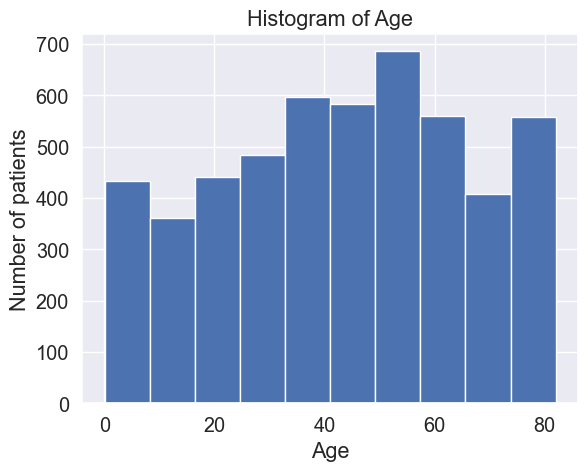

In [246]:
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of Gender')

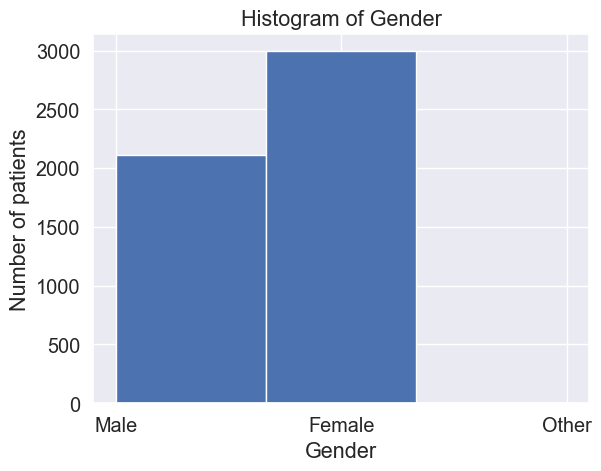

In [247]:
plt.hist(df['gender'], bins=3)
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Histogram of Gender')


Text(0.5, 1.0, 'Histogram of Hypertension')

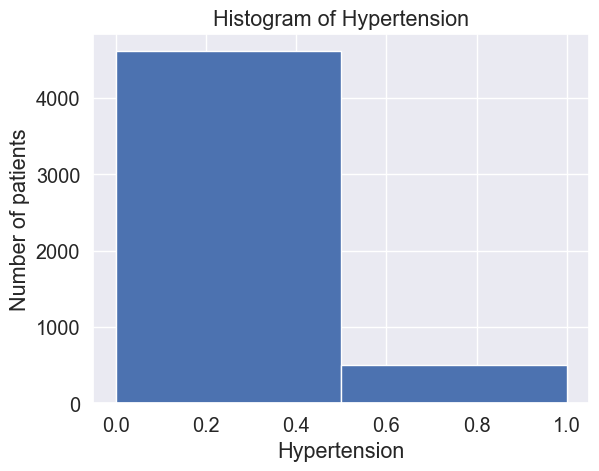

In [248]:
plt.hist(df['hypertension'], bins=2)
plt.xlabel('Hypertension')
plt.ylabel('Number of patients')
plt.title('Histogram of Hypertension')

Text(0.5, 1.0, 'Histogram of Disease')

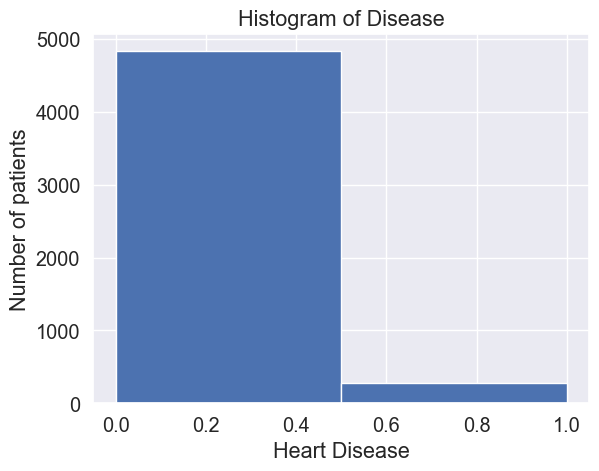

In [249]:
plt.hist(df['heart_disease'], bins=2)
plt.xlabel('Heart Disease')
plt.ylabel('Number of patients')
plt.title('Histogram of Disease')

Text(0.5, 1.0, 'Histogram of Average Glucose Level')

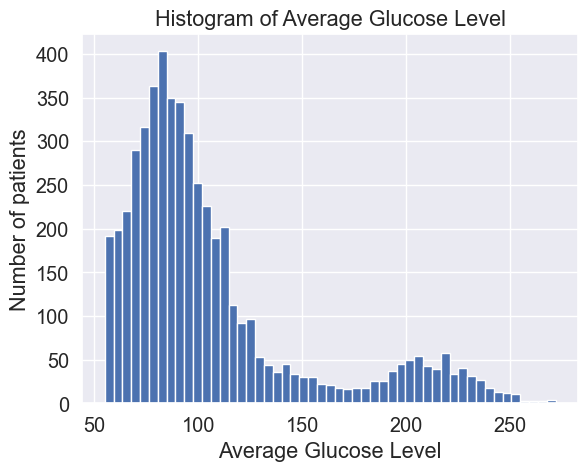

In [250]:
plt.hist(df['avg_glucose_level'], bins='auto')
plt.xlabel('Average Glucose Level')
plt.ylabel('Number of patients')
plt.title('Histogram of Average Glucose Level')

Text(0.5, 1.0, 'Histogram of BMI')

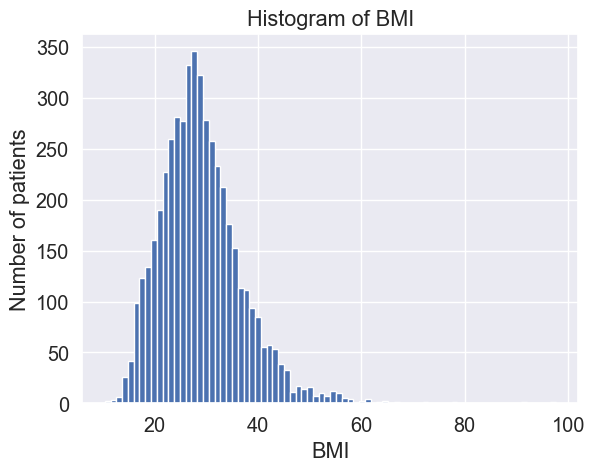

In [251]:
plt.hist(df['bmi'], bins='auto')
plt.xlabel('BMI')
plt.ylabel('Number of patients')
plt.title('Histogram of BMI')

plt.hist(df['smoking_status'], bins='auto')
plt.xlabel('Smoking Status')
plt.ylabel('Number of patients')
plt.title('Smoking Status')

# 3. Data Preparation
Before builing our models, we do data preprocessing on our dataset. This implies cleaning our dataset where we check for duplicates and missing data, impute missing values, remove attributes, etc. 

#### Machine Learning Problem

- In this project we encounter a binary classification problem.
- The prediction is made on the `stroke`-attribute, which is the target variable.
- The purpose is to build a machine learning model, that provides the best prediction on the `stroke`-variable.

- Rename attributes

- Select informative attributes
- Replace missing values
- Declare x and y
- Encode categorical


## Renaming attributes and values

In [252]:
# Renanming column names to get a standardized dataset
df.rename(columns={"id": "Id", "gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart_disease","ever_married":"Ever_married","work_type":"Work_type","avg_glucose_level": "Avg_glucose_level","bmi":"BMI","smoking_status":"Smoking_status","stroke":"Stroke"}, inplace = True)

# Renaming value names of attributes
df["Work_type"].replace({"Self-employed":"Self_employed","children":"Children", "Govt_job":"Government_job", "Private":"Private_job"}, inplace = True)
# df["Smoking_status"].replace({"never smoked":"Never Smoked","formerly smoked":"Formerly Smoked", "smokes":"Smokes"}, inplace = True) # Dropping this later
# Encoding categorical to binary value
df["Ever_married"].replace({"No":0, "Yes":1}, inplace = True)

# Changing the order of the attributes
df = df[["Id","Age","Gender","Ever_married","BMI","Work_type","Residence_type","Smoking_status","Hypertension","Heart_disease","Avg_glucose_level","Stroke"]]

# Printing a glimpse of dataset after processing
print("After preprocessing, the data set looks as follows :")
df.head()

After preprocessing, the data set looks as follows :


,Id,Age,Gender,Ever_married,BMI,Work_type,Residence_type,Smoking_status,Hypertension,Heart_disease,Avg_glucose_level,Stroke
0,9046,67.0,Male,1,36.6,Private_job,Urban,formerly smoked,0,1,228.69,1
1,51676,61.0,Female,1,NaN,Self_employed,Rural,never smoked,0,0,202.21,1
2,31112,80.0,Male,1,32.5,Private_job,Rural,never smoked,0,1,105.92,1
3,60182,49.0,Female,1,34.4,Private_job,Urban,smokes,0,0,171.23,1
4,1665,79.0,Female,1,24.0,Self_employed,Rural,never smoked,1,0,174.12,1


## Selecting informative attributes
How do we select an attribute to partition data in an informative way? Segment the data into groups that are as pure as possible.
By pure we mean homogeneous with respect to the target variable.

Methods for selecting relevant features (lecture 3)
- Gini impurity
- Entropy
- Information gain
- DAG for visualizing causal inferences from observational data.

Må gæres senere
Se evt. https://machinelearningmastery.com/feature-selection-with-numerical-input-data/


In [253]:
# Try to use lower number of attributes
# Only use  the gender, age, hypertension, heart_disease, avg_glucose_level, bmi and smoking_status attributes.
# df = df.drop(['Id','Ever_married','Work_type','Residence_type'], axis='columns')

In [254]:
# Dropping "ID" column from dataframe
#df = df.drop('Id', axis='columns')

# We will only use the gender, age, hypertension, heart_disease, avg_glucose_level, bmi and smoking_status attributes.
# Dropping attributes Id, Ever_married, Work_type, Residence_type
df = df.drop(['Id','Ever_married','Work_type','Residence_type'], axis='columns')

# Shape of dataset after dropping 'id'-attribute
print (f' The dataset contains {df.shape[0]} instances with {df.shape[1]-1} features and 1 output variable')

# Display top 5 instances of dataset after dropping attributes
df.head()

 The dataset contains 5110 instances with 7 features and 1 output variable


,Age,Gender,BMI,Smoking_status,Hypertension,Heart_disease,Avg_glucose_level,Stroke
0,67.0,Male,36.6,formerly smoked,0,1,228.69,1
1,61.0,Female,NaN,never smoked,0,0,202.21,1
2,80.0,Male,32.5,never smoked,0,1,105.92,1
3,49.0,Female,34.4,smokes,0,0,171.23,1
4,79.0,Female,24.0,never smoked,1,0,174.12,1


## Adjusting for null values

### Imputation
Because it is already a rather small dataset, it is preferred not to remove instances with missing values. Instead, we perform imputation where we replace the missing values instead of removing them.
We do this by replacing the missing values with the mean of the rest of the values in the given column

In [255]:
# Replacing missing values with the mean of the rest of the values in the BMI column
df['BMI'] = df['BMI'].replace(np.nan, df['BMI'].mean())

# Checking that the imputation worked 
for col in df:
    print(df[col].isnull().sum(), "missing values in", col)
    
# Source: exercise in lecture 6 

0 missing values in Age
0 missing values in Gender
0 missing values in BMI
0 missing values in Smoking_status
0 missing values in Hypertension
0 missing values in Heart_disease
0 missing values in Avg_glucose_level
0 missing values in Stroke


In [256]:
# Dropping null values from dataframe
# df.dropna(axis = 0, inplace = True)
# print (f' The shape of the dataset after dropping null values is {df.shape}')


## Declaring matrix X and target vector y

In [257]:
# Selecting the relevant attributes and creating the features vector X and the target vector y.

# Target vector
y = df['Stroke'] # 1D array where the ith entry relates to the target of the ith sample (row) of X

# Features matrix
X = df.iloc[:,:-1] # 2D array, where instances are represented as rows and features/attributes are represented as columns.
# All rows, columns from 0 to second last (last column is target)



#y = df.iloc[:, -1].values # All rows, last column
#X = df.iloc[:, 1:-1].values # All rows, column 1 to second last (last column is target variable)
#https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/

## Encode categorical attributes to numerical
As identified under data understanding, there are attribtues in the dataset that need som preprossing.

We identified 4 categorical attributes that need to be encoded into numerical values. The multiple nominal variable are converted into multiple binary-valued features (0s and 1a) by applying the pandas get_dummies()-function. 

The categorical features are: gender, ever_married, work_type, Residence_type, smoking_status

In [258]:
# Encoding categorical attributes in the features matrix X into numerical
X = pd.get_dummies(X)

# Attributes (columns) after encoding

print(f'''After encoding: 
Shape of X: {X.shape}
Features: {X.columns}''')



After encoding: 
Shape of X: (5110, 12)
Features: Index(['Age', 'BMI', 'Hypertension', 'Heart_disease', 'Avg_glucose_level',
       'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Smoking_status_Unknown', 'Smoking_status_formerly smoked',
       'Smoking_status_never smoked', 'Smoking_status_smokes'],
      dtype='object')


In [259]:
# Feature matrix X after encoding
X.head()

,Age,BMI,Hypertension,Heart_disease,Avg_glucose_level,Gender_Female,Gender_Male,Gender_Other,Smoking_status_Unknown,Smoking_status_formerly smoked,Smoking_status_never smoked,Smoking_status_smokes
0,67.0,36.600000,0,1,228.69,0,1,0,0,1,0,0
1,61.0,28.893237,0,0,202.21,1,0,0,0,0,1,0
2,80.0,32.500000,0,1,105.92,0,1,0,0,0,1,0
3,49.0,34.400000,0,0,171.23,1,0,0,0,0,0,1
4,79.0,24.000000,1,0,174.12,1,0,0,0,0,1,0


In [260]:
#  info after pre-processing
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             5110 non-null   float64
 1   BMI                             5110 non-null   float64
 2   Hypertension                    5110 non-null   int64  
 3   Heart_disease                   5110 non-null   int64  
 4   Avg_glucose_level               5110 non-null   float64
 5   Gender_Female                   5110 non-null   uint8  
 6   Gender_Male                     5110 non-null   uint8  
 7   Gender_Other                    5110 non-null   uint8  
 8   Smoking_status_Unknown          5110 non-null   uint8  
 9   Smoking_status_formerly smoked  5110 non-null   uint8  
 10  Smoking_status_never smoked     5110 non-null   uint8  
 11  Smoking_status_smokes           5110 non-null   uint8  
dtypes: float64(3), int64(2), uint8(7)


In [261]:
# Encoding creating a new dataframe

# Creating a new dataframe with encoded attributes
df_encoded = pd.get_dummies(df) 

# Shifting the column with the target variable "Stroke" to the last column of dataframe to perform iloc
shift = df_encoded['Stroke'] 
df_encoded = df_encoded.drop('Stroke', axis = 1)
df_encoded = df_encoded.join(shift)

# Dataframe after pre-processing
df_encoded.head()

,Age,BMI,Hypertension,Heart_disease,Avg_glucose_level,Gender_Female,Gender_Male,Gender_Other,Smoking_status_Unknown,Smoking_status_formerly smoked,Smoking_status_never smoked,Smoking_status_smokes,Stroke
0,67.0,36.600000,0,1,228.69,0,1,0,0,1,0,0,1
1,61.0,28.893237,0,0,202.21,1,0,0,0,0,1,0,1
2,80.0,32.500000,0,1,105.92,0,1,0,0,0,1,0,1
3,49.0,34.400000,0,0,171.23,1,0,0,0,0,0,1,1
4,79.0,24.000000,1,0,174.12,1,0,0,0,0,1,0,1


In [262]:
# Dataframe info after pre-processing
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             5110 non-null   float64
 1   BMI                             5110 non-null   float64
 2   Hypertension                    5110 non-null   int64  
 3   Heart_disease                   5110 non-null   int64  
 4   Avg_glucose_level               5110 non-null   float64
 5   Gender_Female                   5110 non-null   uint8  
 6   Gender_Male                     5110 non-null   uint8  
 7   Gender_Other                    5110 non-null   uint8  
 8   Smoking_status_Unknown          5110 non-null   uint8  
 9   Smoking_status_formerly smoked  5110 non-null   uint8  
 10  Smoking_status_never smoked     5110 non-null   uint8  
 11  Smoking_status_smokes           5110 non-null   uint8  
 12  Stroke                          51

In [263]:
# OLD - Encoding and rewriting the original dataframe
# encode categorical attributes
# encoded = pd.get_dummies(df)
# df = encoded # Remove comment if you want the whole dataframe changed

# Shifting the column with the target variable "Stroke" to the last column of dataframe to perform iloc
# shift = df['Stroke'] 
# df = df.drop('Stroke', axis = 1)
# df = df.join(shift)

# Dataframe after pre-processing
# df.head()

# https://www.turing.com/kb/convert-categorical-data-in-pandas-and-scikit-learn#label-encoding
# https://datagy.io/sklearn-one-hot-encode/


In [264]:
# Dataframe info after pre-processing
# df.info()

In [265]:
# Extracting the dataframe after pre-processing to csv file, creating a cleansed dataset 
#df.to_csv(r'cleansed_dataset.csv')

Correlation map (https://www.kaggle.com/code/helenaglaring/brain-stroke-analysis-accuracy-96-0-32bc8c/edit)


## Addressing Imbalanced Data using SMOTE

Synthetic Minority Over-sampling TEchnique (SMOTE) is applied as a preprocessing technique to address the identified class imbalance in the dataset.
The target variable 'Stroke' was found to unbalanced, as the 'stroke'-patients were highly unrepresented compared to the 'non-stroke' patients. 


SMOTE is used to generate new, "synthetic" instances, which are similiar to instances within the minority class label. In this context, it will generate syntetic instances of stroke patients (instances where y=1).

In [266]:
# Here we declare SMOTE that is used to perform over-sampling and thereby resample the minority class 
from collections import Counter
sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X, y) 

print('----------- Original dataset - without SMOYE ----------')

print('Distribution of Non-Strokes (0) and Strokes (1) in target variable %s' % Counter(y))
print(f'''Shape of X: {X.shape}
Shape of y: {y.shape}''')

print('----------- Re-sampled dataset - with SMOTE ----------')
print('Distribution of Non-Strokes (0) and Strokes (1) in target variable %s ' % Counter(y_res))

print(f'''Shape of X: {X_res.shape}
Shape of y: {y_res.shape}''')

# source: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#r001eabbe5dd7-1
# https://www.jair.org/index.php/jair/article/view/10302/24590

----------- Original dataset - without SMOYE ----------
Distribution of Non-Strokes (0) and Strokes (1) in target variable Counter({0: 4861, 1: 249})
Shape of X: (5110, 12)
Shape of y: (5110,)
----------- Re-sampled dataset - with SMOTE ----------
Distribution of Non-Strokes (0) and Strokes (1) in target variable Counter({1: 4861, 0: 4861}) 
Shape of X: (9722, 12)
Shape of y: (9722,)


## Histograms?

# 4. Modeling

## Train-test split
The dataset is split into a two; a training and test set.


A part of the data goes in the "training set" used to build and train the model, while the other “untouched” part of the data goes in the "test set" used to test and evaluate the performance of the model.

This makes it possible to evaluate the performance of the model trained with training data on new unseen data in the test set. This to build models that are generalizable and predictive.

We use ratio of 0.2 that means 80% data for training and 20% data for validation process.

- Alternative: K-fold cross-validation

In [267]:
# Splitting data into two; training and test dataset. A train-test split is made for the both the original and resampled dataset
folds = 5

# Train-test split without SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/folds, random_state=42)

# Train-test split with SMOTE
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=1/folds, random_state=42)

print("---------- Before SMOTE ----------")
print("Shape of x_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of x_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

print("---------- After SMOTE ----------")
print("Shape of x_train dataset: ", X_train_res.shape)
print("Shape of y_train dataset: ", y_train_res.shape)
print("Shape of x_test dataset: ", X_test_res.shape)
print("Shape of y_test dataset: ", y_test_res.shape)


---------- Before SMOTE ----------
Shape of x_train dataset:  (4088, 12)
Shape of y_train dataset:  (4088,)
Shape of x_test dataset:  (1022, 12)
Shape of y_test dataset:  (1022,)
---------- After SMOTE ----------
Shape of x_train dataset:  (7777, 12)
Shape of y_train dataset:  (7777,)
Shape of x_test dataset:  (1945, 12)
Shape of y_test dataset:  (1945,)


In [268]:
# Calculating the original proportion of Stroke outcomes with respect to the total number of cases before SMOTE
#sum(y)/len(y)*100
print(f'''Proportion of stroke outcomes before SMOTE: {sum(y)/len(y)*100} %''')

# Calculating the new proportion of Stroke outcomes with respect to the total number of cases after SMOTE
#sum(y_res)/len(y_res)*100
print(f'''Proportion of stroke outcomes after SMOTE: {sum(y_res)/len(y_res)*100} %''')

Proportion of stroke outcomes before SMOTE: 4.87279843444227 %
Proportion of stroke outcomes after SMOTE: 50.0 %


## Baseline model

### ZeroR

In [269]:
# Calculating ZeroR baseline model for "Stroke" column
zeroR = y.value_counts()[df['Stroke'].min()]/(y.value_counts()[df['Stroke'].max()] + y.value_counts()[df['Stroke'].min()])
print(zeroR)

0.9512720156555773


## Dummy Classifier

*Source:* 
- https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html?highlight=dummy+classifier#
- Exercise 8


In [270]:
# ---------- Without SMOTE ----------
# Defining a Dummy Classifier model
dummy_clf = DummyClassifier()

# Fitting the model to the training data
dummy_clf.fit(X_train, y_train)

# Predicting y, the binary class label for stroke, for the test data.
y_dummy_clf_pred = dummy_clf.predict(X_test)

# K-Fold Cross-Validation
accuracies = cross_val_score(estimator = dummy_clf, X = X_train, y = y_train, cv = 10)   

# Reporting accuracy of the dummy classifier on the training and test set.
print("---------- WITHOUT SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(dummy_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dummy_clf.score(X_test, y_test)))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores

---------- WITHOUT SMOTE ----------
Accuracy on training set: 0.954
Accuracy on test set: 0.939
0.95 accuracy with a standard deviation of 0.00


**Interpretation:** The dummy classifier is very accurate. This can be caused be the high imbalanced dataset, where only 5% of all instances are instances of stroke (y=1). Meaning that the dummy classifier would display high accuracy, although it always predicts "No Stroke" (y=0).

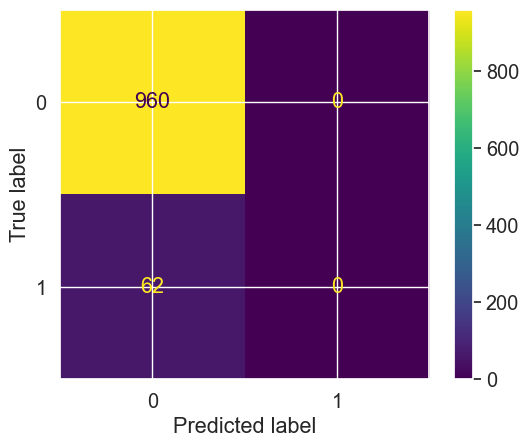

In [271]:
# Inspecting the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_dummy_clf_pred )

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                               display_labels=dummy_clf.classes_)
disp.plot()
plt.show()

**Interpretation:** This indicates that the dummy classifier predicts y=0 every time while getting 95% accuracy due to the imbalanced target variable. We will inspect how the dummy classifier performs with the resampled balanced dataset. 

In [272]:
# ---------- WITH SMOTE ----------
# Defining Dummy Classifier model with the resampled dataset
dummy_clf_res = DummyClassifier()

# Fitting the model to the training data
dummy_clf_res.fit(X_train, y_train)

# Predicting y, the binary class label for stroke, for the test data.
y_dummy_clf_pred = dummy_clf.predict(X_test)

# K-Fold Cross-Validation
accuracies_res = cross_val_score(estimator = dummy_clf_res, X = X_train_res, y = y_train_res, cv = 10)   

# Reporting accuracy of the dummy classifier on the training and test set.
print("---------- WITHOUT SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(dummy_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dummy_clf.score(X_test, y_test)))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores

---------- WITHOUT SMOTE ----------
Accuracy on training set: 0.954
Accuracy on test set: 0.939
0.50 accuracy with a standard deviation of 0.00


**Interpretation:** This score looks better and more realistic after using the balanced dataset.

## Models

### 1. Classification Tree

#### Initial model

K-fold cross validation: 
We also use K-fold cross validation to get a more robust method to calculate accuracy of the test scores

In [273]:
# --- WITHOUT SMOTE ---
# Building our initial Classification Tree Model 
dtree = DecisionTreeClassifier(random_state = 42)

# Fitting the model to the training set
dtree = dtree.fit(X_train, y_train)

# Predicting target values (y) for new data in testing set
y_dtree_pred = dtree.predict(X_test)

# K-Fold Cross-Validation
accuracies = cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 10)   

# Printing scores on training and testing 
print("---------- WITHOUT SMOTE ----------")
print("Accuracy-score on training data: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy-score on testing data: {:.3f}".format(dtree.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score: %.3f' % precision_score(y_test, y_dtree_pred))
print('Recall-score: %.3f\n' % recall_score(y_test, y_dtree_pred))


# --- WITH SMOTE ---
# Building initial Classification Tree Model 
dtree_res = DecisionTreeClassifier(random_state = 42)

# Fitting the model to the training set
dtree_res = dtree_res.fit(X_train_res, y_train_res)

# Predicting target values (y) for new data in testing set
y_dtree_pred_res = dtree_res.predict(X_test)

# K-Fold Cross-Validation
accuracies_res = cross_val_score(estimator = dtree_res, X = X_train_res, y = y_train_res, cv = 10)   

# Printing scores on training and testing set
print("---------- WITH SMOTE ----------")
print("Accuracy on training data {:.3f}".format(dtree_res.score(X_train_res, y_train_res)))
print("Accuracy  on testing data: {:.3f}".format(dtree_res.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies_res.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score: %.3f ' % precision_score(y_test, y_dtree_pred_res))
print('Recall-score: %.3f' % recall_score(y_test, y_dtree_pred_res))


# .3f = format  value as a float to 3 decimal places

# sources: 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# k-fold cross validation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy#Model-Selection-
# Exercise 5

---------- WITHOUT SMOTE ----------
Accuracy-score on training data: 1.000
Accuracy-score on testing data: 0.922
K-Fold Validation Mean Accuracy: 91.49 %
0.91 accuracy with a standard deviation of 0.01
Precision-score: 0.235
Recall-score: 0.129

---------- WITH SMOTE ----------
Accuracy on training data 1.000
Accuracy  on testing data: 0.962
K-Fold Validation Mean Accuracy: 94.45 %
0.94 accuracy with a standard deviation of 0.01
Precision-score: 0.672 
Recall-score: 0.726


**Interpretation**
- Training accuracy of 1.00 + bad accuracy on test data would indicatesoverfitting
- We will tune hyperparameters and pruning the tree in order to avoid overfitting later on

Exercise 5: 
K-cross validation socre - mean and standard deviation: 
The average test score is pretty bad, but more importantly, the standard deviation is quite big. Taken together, this tells us that the model is bad (low average test score), and the generalizability of the model unstable (high standard deviation). Sometimes the model might do okay, but sometimes it's horrible. Hence, this cross-validation tells us to expect the varying scores you might have noticed with your classmates.

In [274]:
# Visualizing the Decision Tree of our initial model

# Remove comment - commented out to save computational power
# --- WITHOUT SMOTE ---
#plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
#tree.plot_tree(dtree,
#               class_names=True,
#               feature_names=list(X.columns), # label features with the column names from X
#               filled=True, # color nodes to indicate majority class
#               fontsize=10) 
#plt.savefig('Initial_tree.png', bbox_inches='tight') # save plot as png file 
# plt.show() # show 
# 



In [275]:
# Remove comment - commented out to save computational power
# --- WITH SMOTE ---
#plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
#tree.plot_tree(dtree_res,
#               class_names=True,
#               feature_names=list(X_res.columns), # label features with the column names from X
#               filled=True, # color nodes to indicate majority class
#               fontsize=10) 
# plt.savefig('Initial_tree_smote.png', bbox_inches='tight') # save plot as png file 
# plt.show()


#### Feature Importance

In [276]:
# Applying feature_importances_ on the classification tree
importance = dtree.feature_importances_

# Creating a dataframe with the feature importance values
data = list(zip(df_encoded.columns, dtree.feature_importances_))
df_feature_importance = pd.DataFrame(data, columns =['Feature', 'Importance'])

# source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_


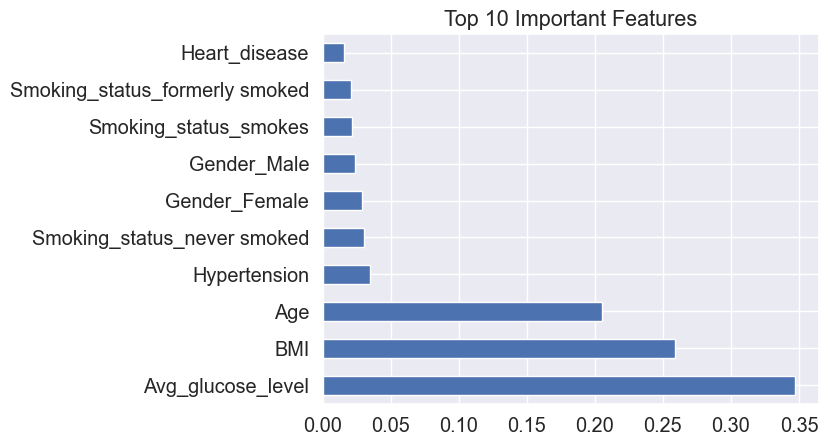

In [277]:
# ---------- WITHOUT SMOTE ----------
# Plotting top 10 feature importances of the classification tree
feature_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

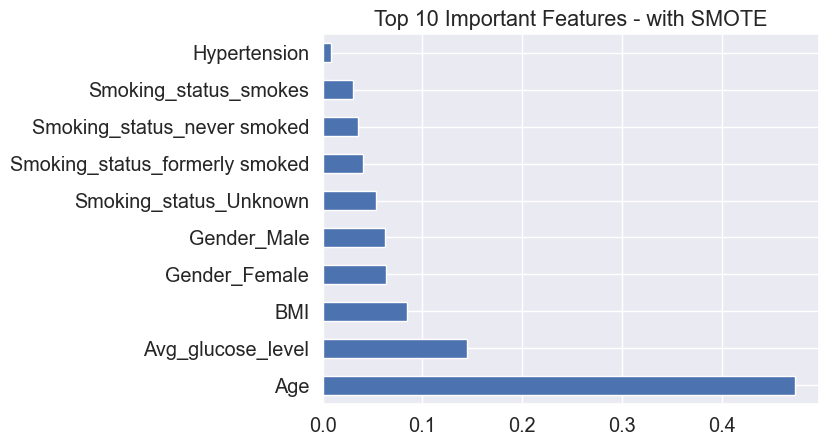

In [278]:
# ---------- WITH SMOTE ----------
# Plotting top 10 feature importances of the classification tree  - WITH SMOTE
feature_importances_res = pd.Series(dtree_res.feature_importances_, index=X.columns)
feature_importances_res.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - with SMOTE")
plt.show()

#### Optimizing hyperparameters

##### RandomizedSearchCV

To avoid overfitting we will tune the model, by optimizing the hyperparameters.

Alternative method for optimizing hyperparameters:
- Grid search (session 5)

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.



Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
Source: https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318

In [279]:
# Applying RandomizedSearchCV for hyperparameter optimization
# Declaring parameters to search through 
parameters = {'max_depth' : (2,4,5,6,7),
              'min_samples_leaf' : [1,2,3,4,5],
              'max_leaf_nodes' : [14,16,18,20,22],
              'min_samples_split' : [2,3,4,5],
              'criterion' : ('gini', 'entropy')
             }

# Implementing RandomizedSearchCV for the model
# --- Without SMOTE --- 
dtree_tuned_pipeline = make_pipeline(StandardScaler(), 
                                    RandomizedSearchCV(DecisionTreeClassifier(), 
                                                       random_state = 5, param_distributions = parameters, 
                                                       cv = 5, verbose = True, scoring = 'recall'))
# --- With SMOTE --- 
dtree_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                       RandomizedSearchCV(DecisionTreeClassifier(), 
                                                          random_state = 5, param_distributions = parameters, 
                                                          cv = 5, verbose = True, scoring = 'recall'))

# Fitting models to training set
# --- Without SMOTE --- 
dtree_tuned = dtree_tuned_pipeline.fit(X_train,y_train)
# --- With SMOTE --- 
dtree_tuned_res = dtree_tuned_pipeline_res.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


##### Best scores

In [280]:
# --- Without SMOTE --- 
# Printing the best scores obtained from RandomSearchCV
# print("Best cross-validation score: {:.2f}".format(XXX.best_score_))

In [281]:
# --- With SMOTE --- 
# Printing the best scores obtained from RandomSearchCV
#print("Best cross-validation score: {:.2f}".format(dtree_tuned_res.best_score_))

##### Identifying optimal hyperparameters

In [282]:
# --- Without SMOTE --- 
# Identifying the most optimal hyperparameters
dtree_tuned[1].best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 14,
 'max_depth': 7,
 'criterion': 'gini'}

In [283]:
# --- With SMOTE --- 
# Identifying the most optimal hyperparameters
dtree_tuned_res[1].best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 20,
 'max_depth': 2,
 'criterion': 'gini'}

#### Tuning models

In [284]:
# Optimizing model without SMOTE 
dtree_tuned = DecisionTreeClassifier(min_samples_split=3, 
                                   min_samples_leaf=4,
                                   max_leaf_nodes=20,
                                   max_depth=2, 
                                   criterion='gini')

In [285]:
# Optimizing Classification Tree model with SMOTE 
dtree_tuned_res = DecisionTreeClassifier(min_samples_split=5, 
                                   min_samples_leaf=2,
                                   max_leaf_nodes=20,
                                   max_depth=6, 
                                   criterion='entropy')

In [286]:
# Fitting models to training set 

# --- Without SMOTE --- 
dtree_tuned.fit(X_train, y_train)

# --- With SMOTE --- 
dtree_tuned_res.fit(X_train_res, y_train_res)



DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=20,
                       min_samples_leaf=2, min_samples_split=5)

#### Predicting 
The trained classification tree model is used to predict the outcome of the target variable y (Stroke 1 or 0) using the testing set

In [287]:
# Predicting X in testing data - this is equal to y

# --- Without SMOTE --- 
y_dtree_pred = dtree_tuned.predict(X_test)



# --- With SMOTE --- 
y_dtree_pred_res = dtree_tuned_res.predict(X_test)




#### Reporting scores

We will now compute the accuracy score of the predicted values to evaluate how well the model is classifying new cases.

*Source:* https://scikit-learn.org/stable/modules/model_evaluation.html

In [288]:
# Printing scores on training and testing set for both models

# --- Without SMOTE --- 
print("---------- Without SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(dtree_tuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(dtree_tuned.score(X_test, y_test)))
print('Precision-score: %.3f' % precision_score(y_test, y_dtree_pred))
print('Recall-score: %.3f\n' % recall_score(y_test, y_dtree_pred))

# --- With SMOTE --- 
print("---------- With SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(dtree_tuned_res.score(X_train_res, y_train_res)))
print("Accuracy on testing set: {:.3f}".format(dtree_tuned_res.score(X_test, y_test)))
print('Precision-score: %.3f' % precision_score(y_test, y_dtree_pred_res))
print('Recall-score: %.3f' % recall_score(y_test, y_dtree_pred_res))

# Calculating accuracy by hand
##print('Accuracy: ', sum(y_test==y_pred)/len(y_test)) # by hand

# Calcylating accuracy by using metrics library
#from sklearn import metrics 
#print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

---------- Without SMOTE ----------
Accuracy on training set: 0.954
Accuracy on testing set: 0.939
Precision-score: 0.000
Recall-score: 0.000

---------- With SMOTE ----------
Accuracy on training set: 0.850
Accuracy on testing set: 0.829
Precision-score: 0.213
Recall-score: 0.677


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Interpretation:**

- Hvorfor bliver precision og recall score 0? - TJEK

#### Confusion Matrices

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


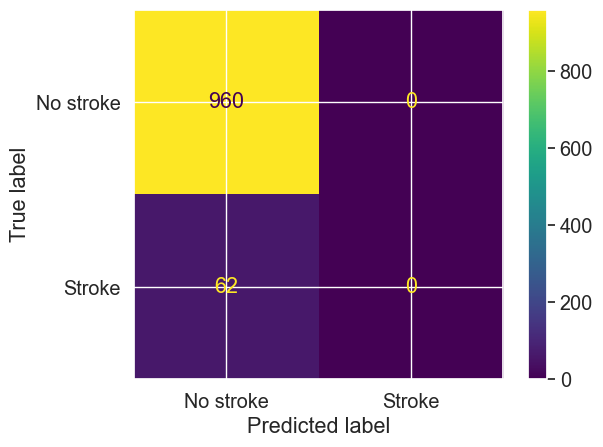

In [289]:
# ---------- without SMOTE ----------
# Confusion matrix plot for model without SMOTE
plot_confusion_matrix(dtree_tuned, X_test, y_test, display_labels = ["No stroke", "Stroke"])


In [290]:
# Printing precision and recall score for model with and without SMOTE
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_dtree_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_dtree_pred_res))

print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_dtree_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_dtree_pred_res))

Precision-score without SMOTE: 0.000
Precision-score with SMOTE: 0.213 

Recall-score without SMOTE: 0.000
Recall-score with SMOTE: 0.677


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Visualization of tuned classification trees

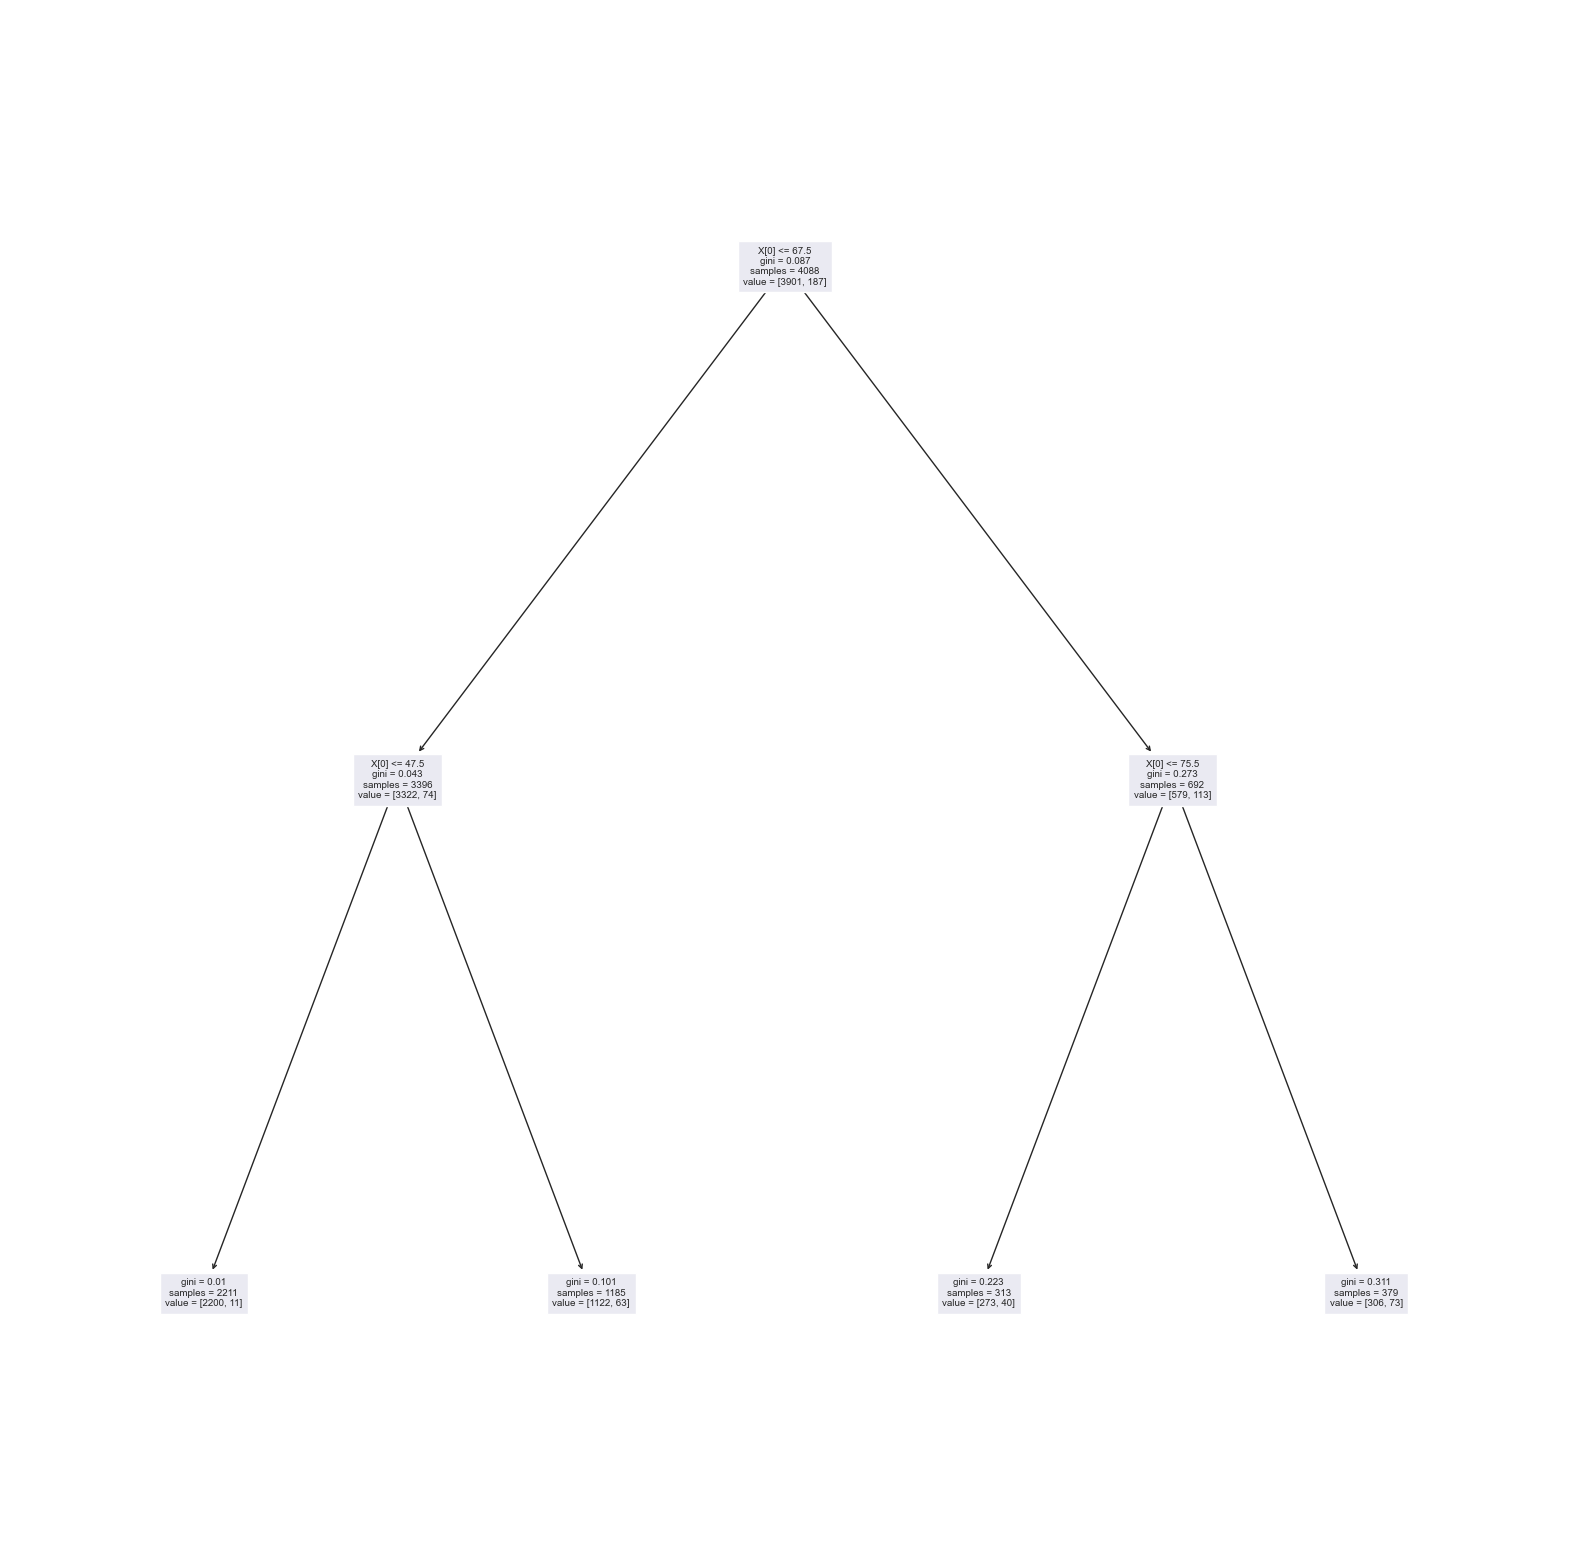

In [291]:
# Visualizing the new tuned, pruned trees like we did above

# ---------- without SMOTE ----------
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(dtree_tuned, fontsize=7)
#plt.savefig('Classification Tree without SMOTE.png')
plt.show()

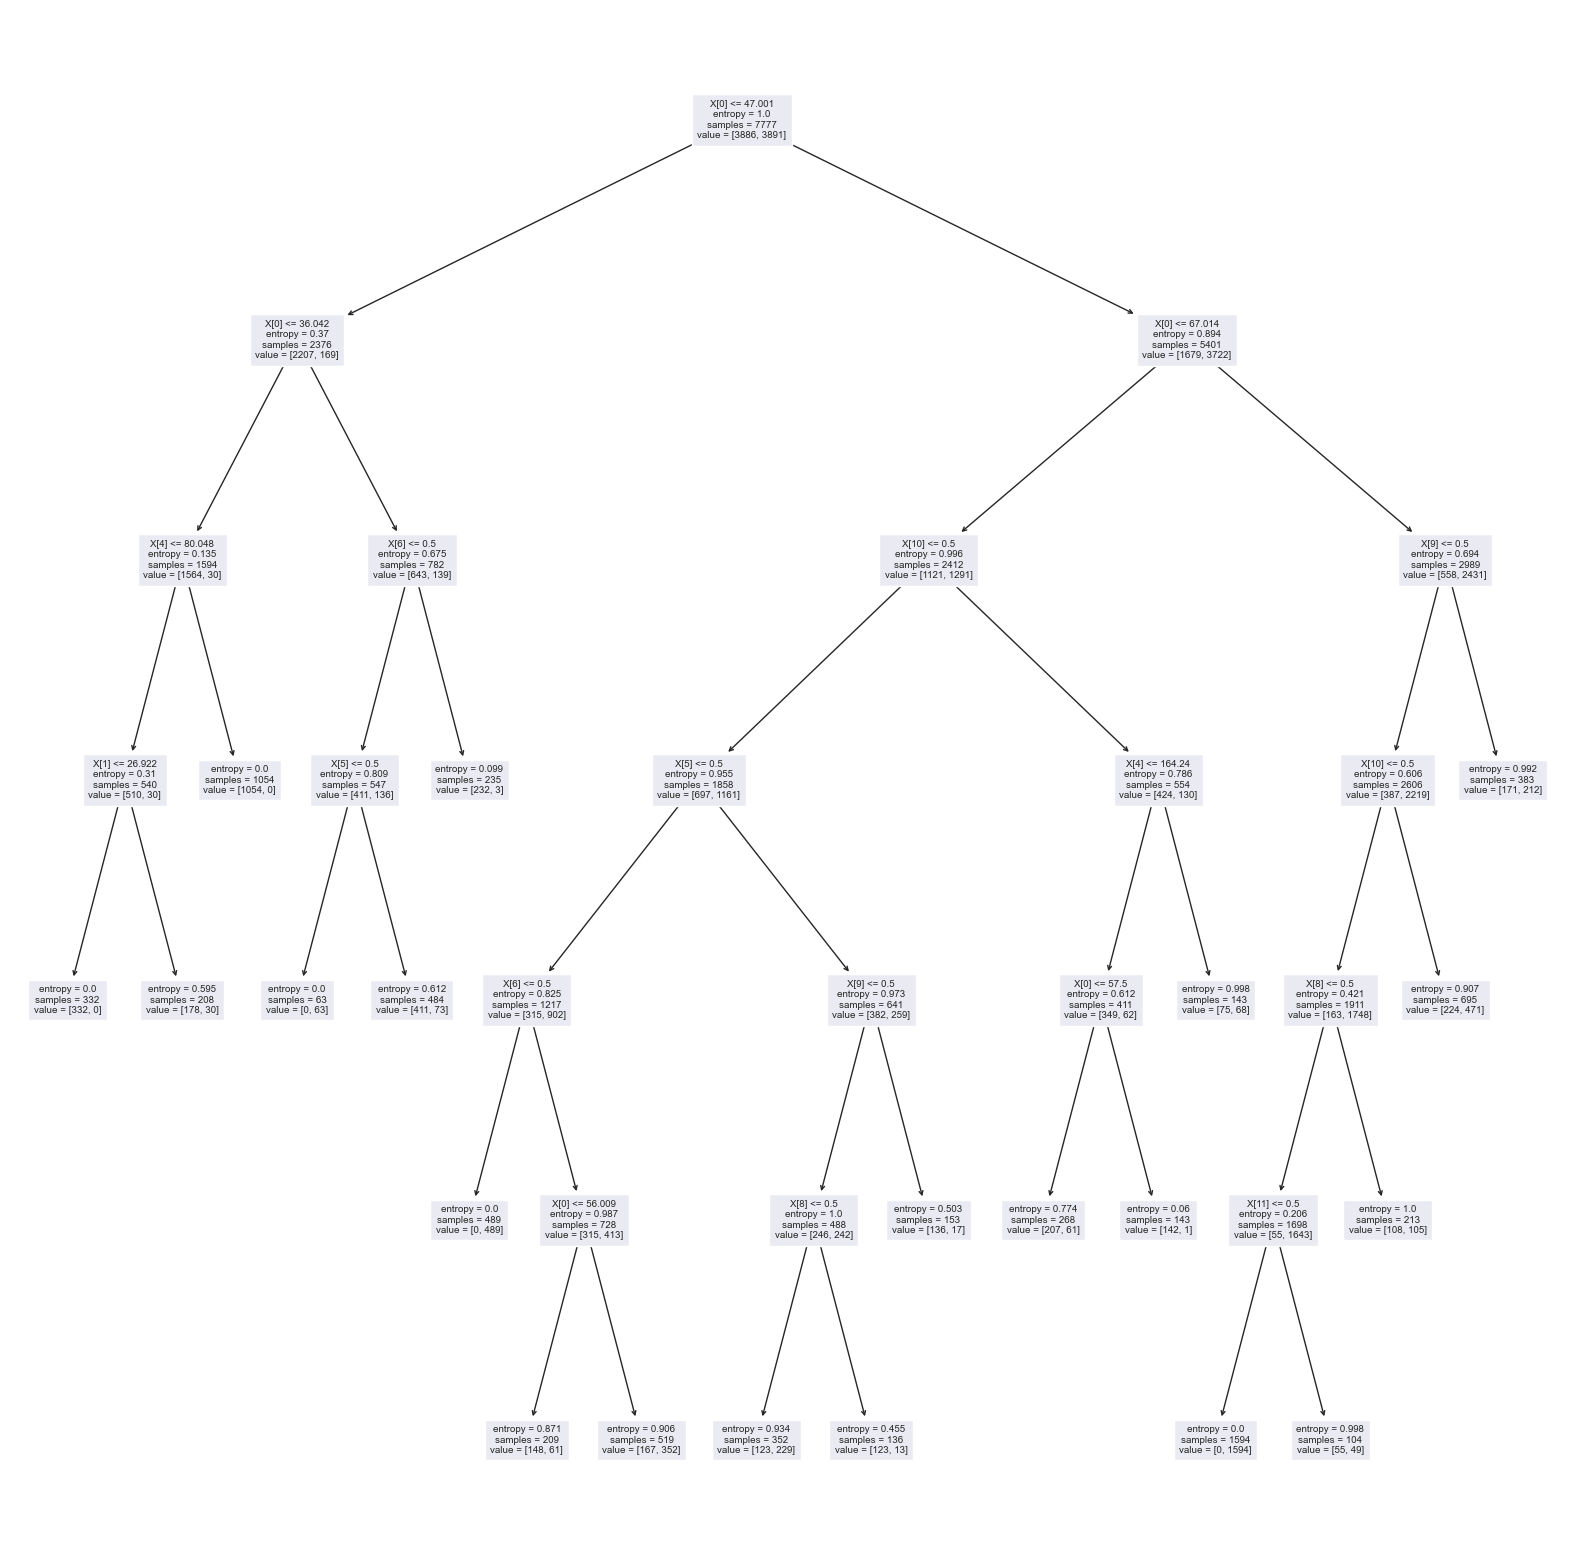

In [292]:
# ---------- with SMOTE ----------
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(dtree_tuned_res, fontsize=7)
# plt.savefig('Classification Tree with SMOTE.png')
plt.show()

### 2. Logistic Regression
"Logistic regression predicts a class value for a a variable based on the value of another variable. Although the model has regression in its name, logistic regression is for classification tasks with a categorical target variable."

*Source:* Lecture 4

#### Initial model

In [293]:
# ---------- without SMOTE ----------
# Building initial Logistic Regression Model to predict 'Stroke'. 
logr = LogisticRegression(max_iter=10000, random_state = 42)

# Fitting model to training set data
logr = logr.fit(X_train, y_train)

# Predicting X in testing data 
y_logr_pred = logr.predict(X_test)

# Calculating K-Fold Cross-Validation score
accuracies = cross_val_score(estimator = logr, X = X_train, y = y_train, cv = 10)   

# Reporting scores on training and testing set 
print("---------- WITHOUT SMOTE ----------")
print("Accuracy-score on training set: {:.3f}".format(logr.score(X_train, y_train)))
print("Accuracy-score on test set: {:.3f}\n".format(logr.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score: %.3f' % precision_score(y_test, y_logr_pred))
print('Recall-score: %.3f' % recall_score(y_test, y_logr_pred))

# ---------- with SMOTE ----------
# Building initial Logistic Regression Model
logr_res = LogisticRegression(max_iter=10000, random_state = 42)

# Fitting model to training data
logr_res = logr_res.fit(X_train_res, y_train_res)

# Predicting X in testing data
y_logr_pred_res = logr_res.predict(X_test)

# Calculating K-Fold Cross-Validation score
accuracies_res = cross_val_score(estimator = logr_res, X = X_train, y = y_train, cv = 10)   

# Reporting scores on training and testing set 
print("---------- WITH SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(logr_res.score(X_train_res, y_train_res)))
print("Accuracy on test set: {:.3f}\n".format(logr_res.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies_res.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score: %.3f' % precision_score(y_test, y_logr_pred_res))
print('Recall-score: %.3f' % recall_score(y_test, y_logr_pred_res))

---------- WITHOUT SMOTE ----------
Accuracy-score on training set: 0.954
Accuracy-score on test set: 0.939

K-Fold Validation Mean Accuracy: 95.45 %
0.95 accuracy with a standard deviation of 0.00
Precision-score: 0.000
Recall-score: 0.000


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------- WITH SMOTE ----------
Accuracy on training set: 0.905
Accuracy on test set: 0.902

K-Fold Validation Mean Accuracy: 95.45 %
0.95 accuracy with a standard deviation of 0.00
Precision-score: 0.203
Recall-score: 0.210


**Interpretation:**
- **Accuracy-score:** The logistic regression score is a measure of the mean accuracy on the given data. 




In [294]:
# Reporting the regression coefficiens

# ---------- without SMOTE ----------
coefficient = logr.coef_ 

print('Regression coefficients:')
print('---- without SMOTE: ---- ')
print(coefficient)

# ---------- with SMOTE ----------
coefficient_res = logr_res.coef_ 

print('---- with SMOTE: ---- ')
print(coefficient_res)
# 

Regression coefficients:
---- without SMOTE: ---- 
[[ 0.06975061  0.00280173  0.34509839  0.28742333  0.0038038  -0.00231653
   0.00997003  0.          0.01926479 -0.07019021 -0.12768609  0.186265  ]]
---- with SMOTE: ---- 
[[ 8.41337133e-02  1.38383455e-02 -6.22588552e-01 -6.33047484e-01
   4.96476871e-03 -5.09761075e+00 -4.83135207e+00 -1.46328239e-01
  -5.65284120e+00 -5.60673142e+00 -5.39411682e+00 -5.70358251e+00]]


**Interpretation:**
- **Regression Coefficient:** "There's a value for each of the 6 possible house types. Technically, each coefficient is different, but because they're basically 0 and rounded, they look the same here.
Why are they all basically 0? Well, there's basically no association between house type and price. We can also see this in the very bad fit of the model to the data: *^2 = 0.083." (lecture 4)

The change in the log-odds ratio for y per unit change in x; the change in log odds of a patient having stroke for each attribute.
When exponentiated, this becomes the change in the odds ratio for y per unit change in X.


In [295]:
# Investegating the coefficient
# ---------- without SMOTE ----------
odds = np.exp(coefficient)

print('Exponentiated log-odds ratio')
print('---- without SMOTE: ---- ')
print(odds)


# ---------- with SMOTE ----------
coefficient_res = logr_res.coef_ 
odds_res = np.exp(coefficient_res)
print('---- with SMOTE: ---- ')
print(odds_res)

Exponentiated log-odds ratio
---- without SMOTE: ---- 
[[1.07224074 1.00280566 1.41212885 1.33298839 1.00381104 0.99768615
  1.01001989 1.         1.01945156 0.93221649 0.88012962 1.20474148]]
---- with SMOTE: ---- 
[[1.08777433 1.01393454 0.53655374 0.53097121 1.00497711 0.00611133
  0.00797573 0.8638741  0.00350754 0.00367306 0.00454323 0.003334  ]]


Interpretation:
- This means that on average, for an increase of 1 in age, the odds that the patient will have a stroke is 1.08 (with SMOTE) — meaning the odds increase only a little. For examlpe, 1 would mean no effect at all.

PROBLEM

#### Optimizing hyperparameters

##### RandomSearchCV
Alternative: 
- GridSearchCV

In [296]:
# Using RandomizedSearchCV to optimize hyperparameters for LogisticRegression
# Declaring parameters to search through 
parameters = {'max_iter' : (80,90,100,110,120,130,140,150,160,180),
             'solver' : ('newton-cg','lbfgs','sag','saga')}


# Creating models through RandomizedSearchCV with Standardscaler for datasets with and without SMOTE
# --- Without SMOTE --- 
logr_tuned_pipeline  = make_pipeline(StandardScaler(), 
                                     RandomizedSearchCV(LogisticRegression(), 
                                                        random_state = 5, param_distributions = parameters, 
                                                        cv = 5, verbose = True, scoring = 'recall'))
# --- With SMOTE --- 
logr_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                        RandomizedSearchCV(LogisticRegression(), 
                                                           random_state = 5, param_distributions = parameters, 
                                                           cv = 5, verbose = True, scoring = 'recall'))

# Fitting models to training set
# --- Without SMOTE --- 
logr_tuned = logr_tuned_pipeline.fit(X_train,y_train)
# --- With SMOTE --- 
logr_tuned_res = logr_tuned_pipeline_res.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

wtf sker der

##### Identifying optimal hyperparameters

In [297]:
# ---------- without SMOTE----------
# Identifying the best hyperparameters without SMOTE
logr_tuned[1].best_params_

{'solver': 'newton-cg', 'max_iter': 130}

In [298]:
# ---------- with SMOTE----------
# Identifying the best hyperparameters with SMOTE
logr_tuned_res[1].best_params_

{'solver': 'sag', 'max_iter': 130}

#### Tuning models

In [299]:
# Building optimized models using the identified optimal hyperparameters

# ---------- without SMOTE----------
logr_tuned = LogisticRegression(max_iter=130, solver='newton-cg')

# ---------- with SMOTE----------
logr_tuned_res = LogisticRegression(max_iter=180, solver='saga')


In [300]:
# Fitting the optimized models to training set 

# ---------- without SMOTE----------
logr_tuned.fit(X_train, y_train)
# ---------- with SMOTE----------
logr_tuned_res.fit(X_train_res, y_train_res)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=180, solver='saga')

#### Predicting

In [301]:
# Predicting X in testing data - this is equal to y

# ---------- without SMOTE----------
# Predicting X in testing data without SMOTE
y_logr_pred = logr_tuned.predict(X_test)

# ---------- with SMOTE----------
# Predicting X in testing data with SMOTE
y_logr_pred_res= logr_tuned_res.predict(X_test)

#### Reporting Scores

In [302]:
# --- Without SMOTE --- 

# Printing scores on training and testing set for both models
print("---------- Without SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(logr_tuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}\n".format(logr_tuned.score(X_test, y_test)))
print('Precision-score: %.3f' % precision_score(y_test, y_logr_pred))
print('Recall-score: %.3f\n' % recall_score(y_test, y_logr_pred))



# --- With SMOTE --- 

# Printing scores on training and testing set for both models
print("---------- With SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(logr_tuned_res.score(X_train_res, y_train_res)))
print("Accuracy on testing set {:.3f}\n".format(logr_tuned_res.score(X_test, y_test)))
print('Precision-score: %.3f' % precision_score(y_test, y_logr_pred_res))
print('Recall-score: %.3f' % recall_score(y_test, y_logr_pred_res))

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------- Without SMOTE ----------
Accuracy on training set: 0.954
Accuracy on testing set: 0.939

Precision-score: 0.000
Recall-score: 0.000

---------- With SMOTE ----------
Accuracy on training set: 0.853
Accuracy on testing set 0.821

Precision-score: 0.196
Recall-score: 0.629


##### K-fold cross-validation

*Source:* Lecture 6 (Ikke sikkert vi skal bruge det)

In [303]:
# ---------- without SMOTE----------
scores = cross_val_score(logr, X_train, y_train, cv=10)
print("---------- Without SMOTE ----------")
print(scores)

# ---------- without SMOTE----------
scores_res = cross_val_score(logr, X_train_res, y_train_res, cv=10)
print("\n---------- With SMOTE ----------")
print(scores_res)


---------- Without SMOTE ----------
[0.95843521 0.95354523 0.95354523 0.95354523 0.95354523 0.95354523
 0.95354523 0.95354523 0.95588235 0.95588235]

---------- With SMOTE ----------
[0.89460154 0.90231362 0.90488432 0.9151671  0.90874036 0.90102828
 0.9151671  0.91505792 0.89189189 0.9034749 ]


In [304]:
#Using this to report the mean and standard deviation of test scores
# ---------- without SMOTE----------
print("---------- Without SMOTE ----------")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
# ---------- with SMOTE----------

print("\n---------- With SMOTE ----------")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_res.mean(), scores_res.std()))

---------- Without SMOTE ----------
0.95 accuracy with a standard deviation of 0.00

---------- With SMOTE ----------
0.91 accuracy with a standard deviation of 0.01


#### Confusion Matrix Plots

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


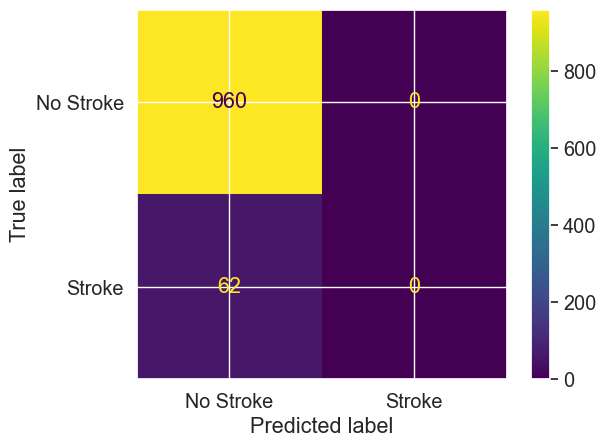

In [305]:
# ---------- without SMOTE----------
# Plotting confusion matrix for model without SMOTE
plot_confusion_matrix(logr_tuned, X_test, y_test, display_labels = ["No Stroke", "Stroke"])




/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


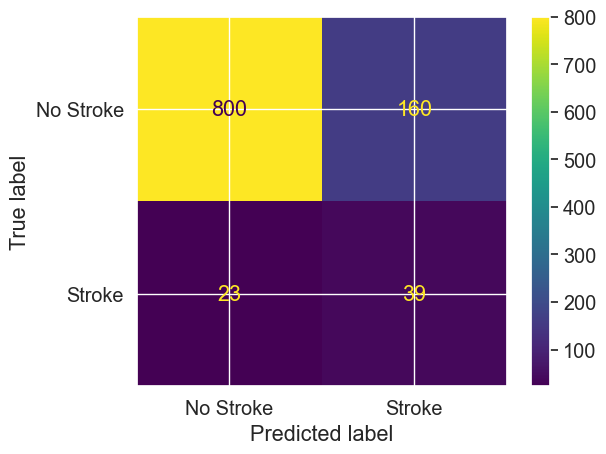

In [306]:
# ---------- with SMOTE----------
# Plotting confusion matrix for model with SMOTE
plot_confusion_matrix(logr_tuned_res, X_test, y_test, display_labels = ["No Stroke", "Stroke"])



In [307]:
# Printing precision and recall score for model with and without SMOTE
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_logr_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_logr_pred_res))

print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_logr_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_logr_pred_res))

Precision-score without SMOTE: 0.000
Precision-score with SMOTE: 0.196 

Recall-score without SMOTE: 0.000
Recall-score with SMOTE: 0.629


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN Classifier
*Source:* Session 6

#### Initial model

In [308]:
# Creating an initial  KNeighbors Classifier Model 

# ---------- without SMOTE ---------- 
neigh = KNeighborsClassifier()

# Fitting model to training data
neigh = neigh.fit(X_train, y_train)

# Predicting X in testing data
y_neigh_pred = neigh.predict(X_test)

# Calculating K-Fold Cross-Validation score
accuracies = cross_val_score(estimator = logr, X = X_train, y = y_train, cv = 10)   

# Reporting scores on training and testing set 
print("---------- WITHOUT SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(neigh.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(neigh.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score: %.3f' % precision_score(y_test, y_neigh_pred))
print('Recall-score: %.3f \n' % recall_score(y_test, y_neigh_pred))

# ---------- with SMOTE ---------- 
#Creating a preliminary KNeighbors Classifier 
neigh_res = KNeighborsClassifier()

# Fitting model to training data
neigh_res = neigh_res.fit(X_train_res, y_train_res)

# Predicting X in testing data
y_neigh_pred_res = neigh_res.predict(X_test)

# Calculating K-Fold Cross-Validation score
accuracies_res = cross_val_score(estimator = logr, X = X_train, y = y_train, cv = 10)   

# Printing accuracy-score on training and testing set 
print("Accuracy on training set with SMOTE: {:.3f}".format(neigh_res.score(X_train_res, y_train_res)))
print("Accuracy of the model with SMOTE using testing data: {:.3f}".format(neigh_res.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies_res.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score with SMOTE: %.3f' % precision_score(y_test, y_neigh_pred_res))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_neigh_pred_res))

---------- WITHOUT SMOTE ----------
Accuracy on training set: 0.955
Accuracy on test set 0.935
K-Fold Validation Mean Accuracy: 95.45 %
0.95 accuracy with a standard deviation of 0.00
Precision-score: 0.000
Recall-score: 0.000 

Accuracy on training set with SMOTE: 0.916
Accuracy of the model with SMOTE using testing data: 0.853
K-Fold Validation Mean Accuracy: 95.45 %
0.95 accuracy with a standard deviation of 0.00
Precision-score with SMOTE: 0.292
Recall-score with SMOTE: 1.000


##### Optimizing hyperparameters

In [309]:
# Using RandomizedSearchCV to optimize hyperparameters for KNN Classifier
# Declaring parameters to search through 
parameters = {'n_neighbors' : (5,15,35,45,55,65,75,85,95),
             'weights' : ('uniform', 'distance')}


# Creating models through RandomizedSearchCV with Standardscaler for datasets with and without SMOTE
neigh_tuned_pipeline  = make_pipeline(StandardScaler(), 
                                    RandomizedSearchCV(KNeighborsClassifier(), 
                                                       random_state = 5, param_distributions = parameters, 
                                                       cv = 5, verbose = True, scoring = 'recall'))
neigh_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                       RandomizedSearchCV(KNeighborsClassifier(), 
                                                          random_state = 5, param_distributions = parameters, 
                                                          cv = 5, verbose = True, scoring = 'recall'))

# Fitting models to training set
# ---------- without SMOTE ----------
neigh_tuned = neigh_tuned_pipeline.fit(X_train,y_train)

# ---------- with SMOTE ----------
neigh_tuned_res = neigh_tuned_pipeline_res.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


###### Identifying optimal hyperparameters

In [310]:
# ---------- without SMOTE ----------
# Identifying the optimal hyperparameters without SMOTE
neigh_tuned[1].best_params_

{'weights': 'distance', 'n_neighbors': 5}

In [311]:
# ---------- with SMOTE ----------
# Identifying the optimal hyperparameters with SMOTE
neigh_tuned_res[1].best_params_

{'weights': 'distance', 'n_neighbors': 5}

#### Tuning models

In [312]:
# Building optimized models using the identifyed hyperparameters

# ---------- without SMOTE ----------
neigh_tuned = KNeighborsClassifier(weights='distance', n_neighbors=5)

# ---------- with SMOTE ----------
neigh_tuned_res = KNeighborsClassifier(weights='distance', n_neighbors=5)


In [313]:
# Fitting models to training set 

# ---------- without SMOTE ----------
neigh_tuned.fit(X_train, y_train)

# ---------- with SMOTE ----------
neigh_tuned_res.fit(X_train_res, y_train_res)

KNeighborsClassifier(weights='distance')

#### Predicting

In [314]:
# ---------- without SMOTE ----------
# Predicting X in testing data without SMOTE
y_neigh_pred = neigh_tuned.predict(X_test)

# ---------- with SMOTE ----------
# Predicting X in testing data with SMOTE
y_neigh_pred_res = neigh_tuned_res.predict(X_test)

#### Reporting Scores

In [316]:
# --- Without SMOTE --- 
# Calculating K-Fold Cross-Validation score
accuracies = cross_val_score(estimator = neigh_tuned, X = X_train, y = y_train, cv = 10)   

# Printing scores on training and testing set for both models
print("---------- Without SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(neigh_tuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}\n".format(neigh_tuned.score(X_test, y_test)))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score: %.3f' % precision_score(y_test, y_neigh_pred))
print('Recall-score: %.3f\n' % recall_score(y_test, y_neigh_pred))

# --- With SMOTE --- 
# Calculating K-Fold Cross-Validation score
accuracies = cross_val_score(estimator = neigh_tuned_res, X = X_train_res, y = y_train_res, cv = 10)   

# Printing accuracy-score on training and testing set for both models
print("Accuracy on training set: {:.3f}\n".format(neigh_tuned_res.score(X_train_res, y_train_res)))
print("Accuracy on testing set: {:.3f}\n".format(neigh_tuned_res.score(X_test, y_test)))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score: %.3f \n' % precision_score(y_test, y_neigh_pred_res))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_neigh_pred_res))


---------- Without SMOTE ----------
Accuracy on training set: 1.000
Accuracy on testing set: 0.932

0.95 accuracy with a standard deviation of 0.00
Precision-score: 0.111
Recall-score: 0.016

Accuracy on training set: 1.000

Accuracy on testing set: 0.947

0.95 accuracy with a standard deviation of 0.00
Precision-score: 0.534 

Recall-score with SMOTE: 1.000


#### Confusion Matrix Plots

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


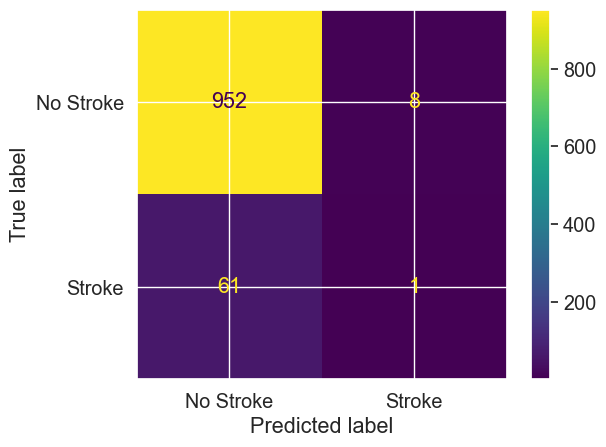

In [317]:
# ---------- without SMOTE ----------
# Plotting confusion matrix for model without SMOTE
plot_confusion_matrix(neigh_tuned, X_test, y_test, display_labels = ["No Stroke", "Stroke"])

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


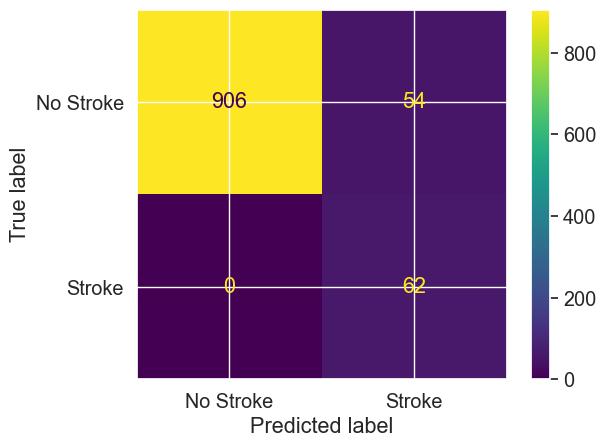

In [318]:
# ---------- with SMOTE ----------
# Plotting confusion matrix for model with SMOTE
plot_confusion_matrix(neigh_tuned_res, X_test, y_test, display_labels = ["No Stroke", "Stroke"])



In [319]:
# Printing precision and recall score for model with and without SMOTE
print('Precision-score without SMOTE: %.3f' % precision_score(y_test, y_neigh_pred))
print('Precision-score with SMOTE: %.3f \n' % precision_score(y_test, y_neigh_pred_res))

print('Recall-score without SMOTE: %.3f' % recall_score(y_test, y_neigh_pred))
print('Recall-score with SMOTE: %.3f' % recall_score(y_test, y_neigh_pred_res))

Precision-score without SMOTE: 0.111
Precision-score with SMOTE: 0.534 

Recall-score without SMOTE: 0.016
Recall-score with SMOTE: 1.000


### 4. Random Forest Regressor

*Source:* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random+forest+regressor
- Exercise 8


#### Initial model

In [320]:
# --- WITHOUT SMOTE ---
# Building initial Random Forest Classifier Model 
rf_clf = RandomForestClassifier()

# Fitting the model to the training set
rf_clf = rf_clf.fit(X_train, y_train)

# Predicting target values (y) for new data in testing set
y_rf_clf_pred = rf_clf.predict(X_test)

# K-Fold Cross-Validation
accuracies = cross_val_score(estimator = rf_clf, X = X_train, y = y_train, cv = 10)   

# Printing scores on training and testing 
print("---------- WITHOUT SMOTE ----------")
print("Accuracy-score on training data: {:.3f}".format(rf_clf.score(X_train, y_train)))
print("Accuracy-score on testing data: {:.3f}".format(rf_clf.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score: %.3f' % precision_score(y_test, y_rf_clf_pred))
print('Recall-score: %.3f\n' % recall_score(y_test, y_rf_clf_pred))


# --- WITH SMOTE ---
# Building initial Classification Tree Model 
rf_clf_res = RandomForestClassifier()

# Fitting the model to the training set
rf_clf_res = rf_clf_res.fit(X_train_res, y_train_res)

# Predicting target values (y) for new data in testing set
y_rf_clf_pred_res = rf_clf_res.predict(X_test)

# K-Fold Cross-Validation
accuracies_res = cross_val_score(estimator = rf_clf_res, X = X_train_res, y = y_train_res, cv = 10)   

# Printing scores on training and testing set
print("---------- WITH SMOTE ----------")
print("Accuracy on training data {:.3f}".format(rf_clf_res.score(X_train_res, y_train_res)))
print("Accuracy  on testing data: {:.3f}".format(rf_clf_res.score(X_test, y_test)))
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies_res.mean()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies_res.mean(), accuracies_res.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score: %.3f ' % precision_score(y_test, y_rf_clf_pred_res))
print('Recall-score: %.3f' % recall_score(y_test, y_rf_clf_pred_res))


# .3f = format  value as a float to 3 decimal places

# sources: 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# k-fold cross validation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy#Model-Selection-
# Exercise 5

---------- WITHOUT SMOTE ----------
Accuracy-score on training data: 1.000
Accuracy-score on testing data: 0.936
K-Fold Validation Mean Accuracy: 95.30 %
0.95 accuracy with a standard deviation of 0.00
Precision-score: 0.200
Recall-score: 0.016

---------- WITH SMOTE ----------
Accuracy on training data 1.000
Accuracy  on testing data: 0.977
K-Fold Validation Mean Accuracy: 96.37 %
0.96 accuracy with a standard deviation of 0.01
Precision-score: 0.953 
Recall-score: 0.661


#### Optimizing Hyperparameters

*Source:*
- https://www.section.io/engineering-education/random-search-hyperparameters/
- https://www.kaggle.com/code/funxexcel/p3-random-forest-tuning-randomizedsearchcv/notebook
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

##### Identifying optimal hyperparameters

In [321]:
# Using RandomizedSearchCV to optimize hyperparameters for Random Forest Classifier
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)] # Returns array with 10 random values between 10 and 80


# Creating the parameter grid with parameters to search through
param_grid = {'n_estimators': n_estimators, # Number of trees in random forest
               'max_features': ['auto', 'sqrt'], # Number of features to consider at every split - 'auto' was depreciated
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], # Maximum number of levels in tree
               'min_samples_split': [2, 5, 10],# Minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 4],# Minimum number of samples required at each leaf node
               'bootstrap': [True, False] }# Method of selecting samples for training each tree

# Creating models through RandomizedSearchCV with Standardscaler for datasets with and without SMOTE
rf_clf_tuned_pipeline  = make_pipeline(StandardScaler(), 
                                    RandomizedSearchCV(RandomForestClassifier(), 
                                                       random_state = 5, param_distributions = param_grid, 
                                                       cv = 5, verbose = True, scoring = 'recall'))
rf_clf_tuned_pipeline_res  = make_pipeline(StandardScaler(), 
                                       RandomizedSearchCV(RandomForestClassifier(), 
                                                          random_state = 5, param_distributions = param_grid, 
                                                          cv = 5, verbose = True, scoring = 'recall'))

# Fitting models to training set
# ---------- without SMOTE ----------
rf_clf_tuned = rf_clf_tuned_pipeline.fit(X_train,y_train)

# ---------- with SMOTE ----------
rf_clf_tuned_res = rf_clf_tuned_pipeline_res.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

In [322]:
# ---------- without SMOTE ----------
# Identifying the optimal hyperparameters without SMOTE
rf_clf_tuned[1].best_params_

{'n_estimators': 41,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [323]:
# ---------- with SMOTE ----------
# Identifying the optimal hyperparameters without SMOTE
rf_clf_tuned_res[1].best_params_

{'n_estimators': 41,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

#### Tuning model

In [324]:
# Building optimized models using the identifyed hyperparameters

# ---------- without SMOTE ----------
rf_clf_tuned = RandomForestClassifier(n_estimators=41, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=20, bootstrap=False)

# ---------- with SMOTE ----------
rf_clf_tuned_res = RandomForestClassifier(n_estimators=41, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=20, bootstrap=False)



In [325]:
# Fitting models to training set 

# ---------- without SMOTE ----------
rf_clf_tuned.fit(X_train, y_train)

# ---------- with SMOTE ----------
rf_clf_tuned_res.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=41)

#### Predicting

In [326]:
# Predicting X in testing data - this is equal to y

# ---------- without SMOTE----------
# Predicting X in testing data 
y_rf_clf_pred = rf_clf_tuned.predict(X_test)

# ---------- with SMOTE----------
# Predicting X in testing data
y_rf_clf_pred_res= rf_clf_tuned_res.predict(X_test)

#### Reporting Scores

In [328]:
# --- Without SMOTE --- 
# Calculating K-Fold Cross-Validation score
accuracies = cross_val_score(estimator = rf_clf_tuned, X = X_train, y = y_train, cv = 10)   

# Printing scores on training and testing set for both models
print("---------- Without SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(rf_clf_tuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}\n".format(rf_clf_tuned.score(X_test, y_test)))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std())) # Printing the mean and standard deviation of the test scores
print('Precision-score: %.3f' % precision_score(y_test, y_rf_clf_pred))
print('Recall-score: %.3f\n' % recall_score(y_test, y_rf_clf_pred))



# --- With SMOTE --- 
# Calculating K-Fold Cross-Validation score
accuracies_res = cross_val_score(estimator = rf_clf_tuned_res, X = X_train_res, y = y_train_res, cv = 10)   

# Printing scores on training and testing set for both models
print("---------- With SMOTE ----------")
print("Accuracy on training set: {:.3f}".format(rf_clf_tuned_res.score(X_train_res, y_train_res)))
print("Accuracy on testing set {:.3f}\n".format(rf_clf_tuned_res.score(X_test, y_test)))
print('Precision-score: %.3f' % precision_score(y_test, y_rf_clf_pred_res))
print('Recall-score: %.3f' % recall_score(y_test, y_rf_clf_pred_res))

---------- Without SMOTE ----------
Accuracy on training set: 1.000
Accuracy on testing set: 0.936

0.95 accuracy with a standard deviation of 0.00
Precision-score: 0.364
Recall-score: 0.065

---------- With SMOTE ----------
Accuracy on training set: 1.000
Accuracy on testing set 0.977

Precision-score: 0.953
Recall-score: 0.661


#### Confusion Matrix Plots

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


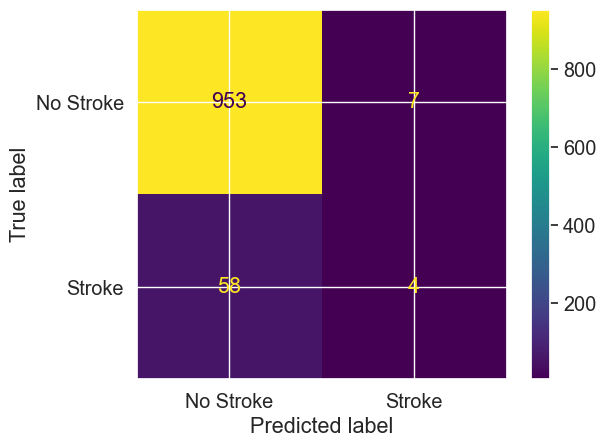

In [329]:
# ---------- without SMOTE ----------
# Plotting confusion matrix for model without SMOTE
plot_confusion_matrix(rf_clf_tuned, X_test, y_test, display_labels = ["No Stroke", "Stroke"])

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


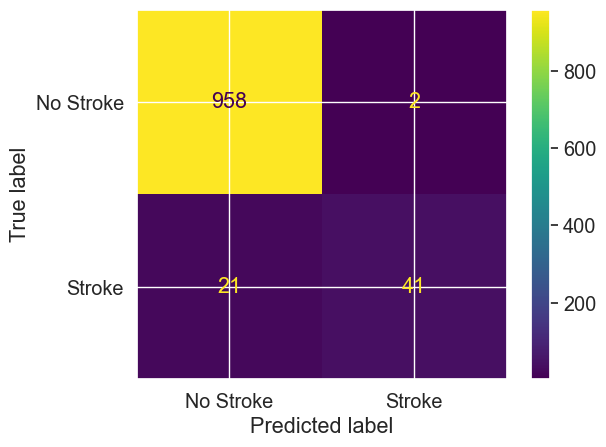

In [330]:
# ---------- with SMOTE ----------
# Plotting confusion matrix for model with SMOTE
plot_confusion_matrix(rf_clf_tuned_res, X_test, y_test, display_labels = ["No Stroke", "Stroke"])



# 5. Evaluation

To evaluate each of out candicate classifier models, we use classification_report function to get scores on performance of the models.

*Source:*
- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


## Classification Reports

### Classification Tree

In [331]:
# Printing the classification report for our Classification Tree Model (w. and wo. SMOTE)

# --- Without SMOTE --- 
print(classification_report(y_test, y_dtree_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [332]:
# --- With SMOTE --- 
print(classification_report(y_test, y_dtree_pred_res))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       960
           1       0.21      0.68      0.32        62

    accuracy                           0.83      1022
   macro avg       0.59      0.76      0.61      1022
weighted avg       0.93      0.83      0.87      1022



### Logistic Regression

In [333]:
# Printing the classification report for our Logistic Regression Model (w. and wo. SMOTE)

# --- Without SMOTE --- 
print(classification_report(y_test, y_logr_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [334]:
# --- With SMOTE --- 
print(classification_report(y_test, y_logr_pred_res))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       960
           1       0.20      0.63      0.30        62

    accuracy                           0.82      1022
   macro avg       0.58      0.73      0.60      1022
weighted avg       0.92      0.82      0.86      1022



### KNN Classifier

In [335]:
# Printing the classification report for our KNN Classifier Model (w. and wo. SMOTE)

# --- Without SMOTE --- 
print(classification_report(y_test, y_neigh_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.11      0.02      0.03        62

    accuracy                           0.93      1022
   macro avg       0.53      0.50      0.50      1022
weighted avg       0.89      0.93      0.91      1022



In [336]:
# --- With SMOTE --- 
print(classification_report(y_test, y_neigh_pred_res))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       960
           1       0.53      1.00      0.70        62

    accuracy                           0.95      1022
   macro avg       0.77      0.97      0.83      1022
weighted avg       0.97      0.95      0.95      1022



### Random Forest Classifier

In [337]:
# Printing the classification report for our Random Forest Classifier Model (w. and wo. SMOTE)

# --- Without SMOTE --- 
print(classification_report(y_test, y_rf_clf_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.36      0.06      0.11        62

    accuracy                           0.94      1022
   macro avg       0.65      0.53      0.54      1022
weighted avg       0.91      0.94      0.92      1022



In [338]:
# --- With SMOTE --- 
print(classification_report(y_test, y_rf_clf_pred_res))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       960
           1       0.95      0.66      0.78        62

    accuracy                           0.98      1022
   macro avg       0.97      0.83      0.88      1022
weighted avg       0.98      0.98      0.98      1022



## Reports on all models

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2148: UserWarning: labels size, 10, does not match size of target_names, 2
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

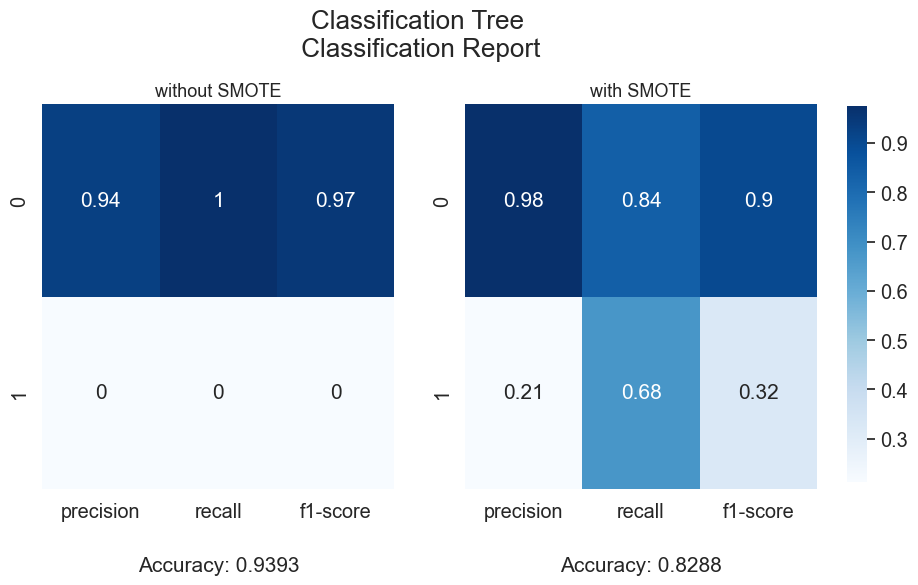

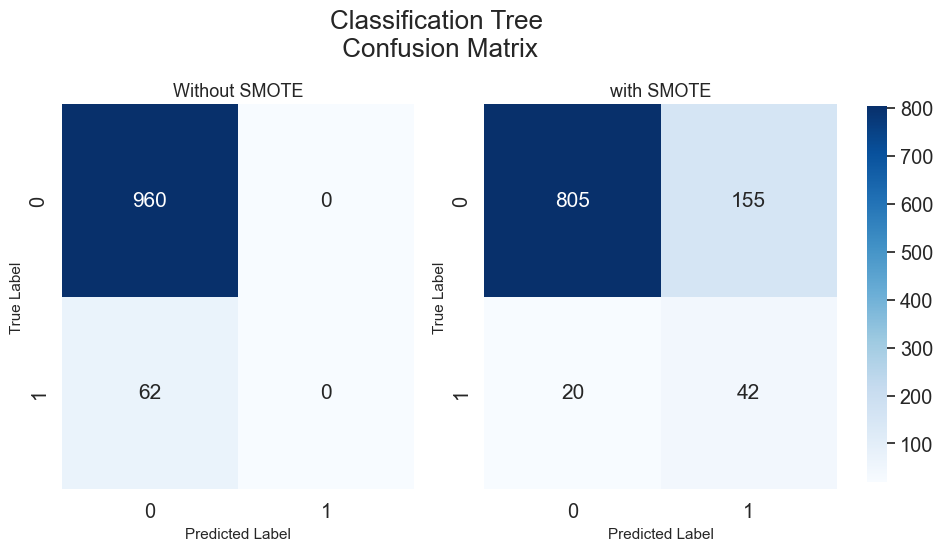

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2148: UserWarning: labels size, 10, does not match size of target_names, 2
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

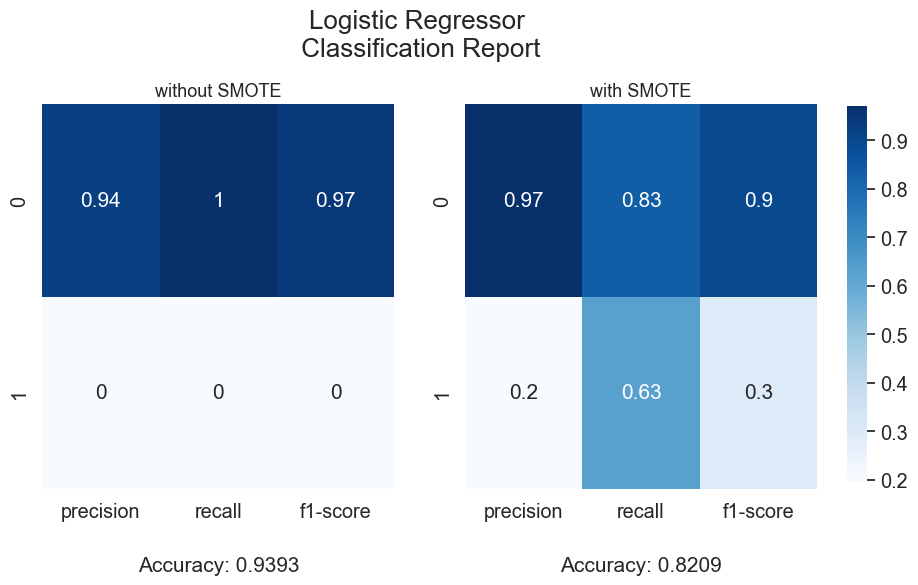

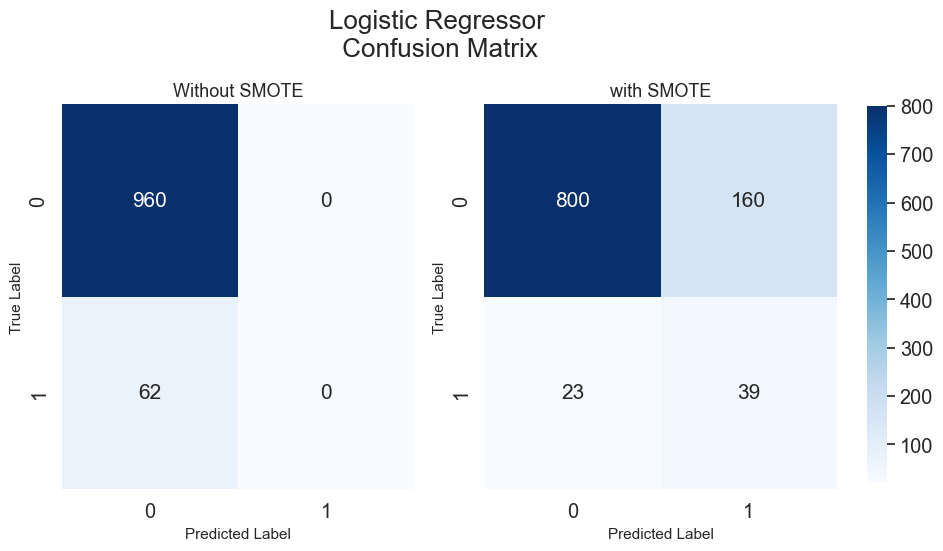

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2148: UserWarning: labels size, 10, does not match size of target_names, 2
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` 

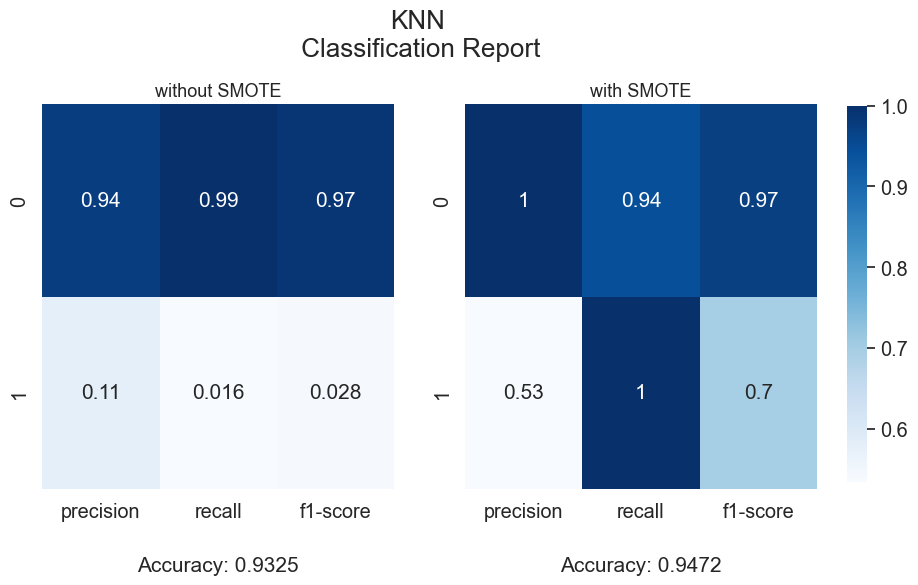

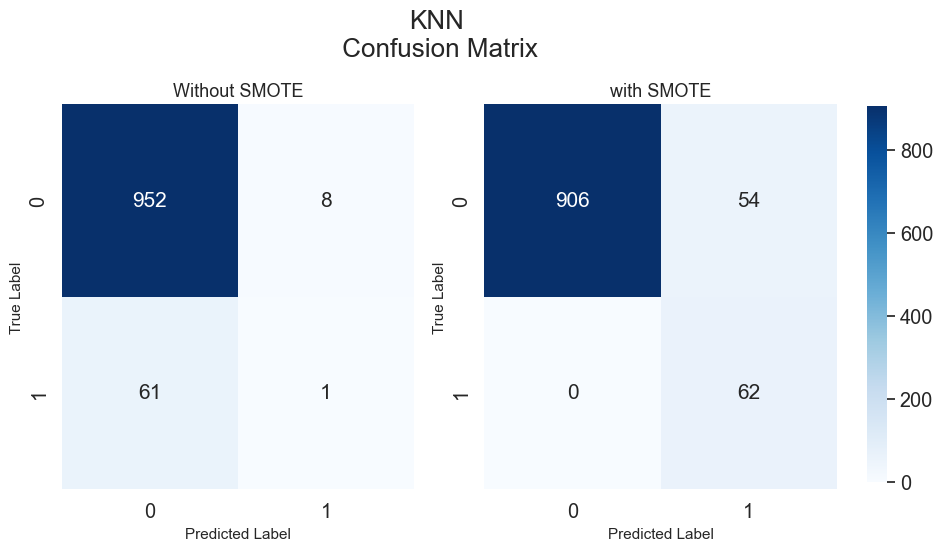

In [339]:
# Creating dynamic functions to visualize scoring-metrics and confusion matrix for all models
labels = np.arange(10)
target_names = list("01")



# Creating a function that plots a classification report showing (recall, precision, f1, and accuracy)
def plot_classification_report(y_test, y_pred, y_pred_res, title): # Takes in predictions from each model trained both with and without SMOTE
    dtree_report = classification_report(y_test, y_pred, labels=labels, target_names=target_names, output_dict=True)
    dtree_report_res = classification_report(y_test, y_pred_res, labels=labels, target_names=target_names, output_dict=True)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    accuracy_sm = round(accuracy_score(y_test, y_pred_res), 4)

    fig = plt.figure(figsize=(10,5)) # Declearing figure for the classification reports
    sns.set(font_scale=1.3)
    fig.suptitle(title + "\n Classification Report", y=1.07)
    cbar_ax = fig.add_axes([.93, 0.125, .02, 0.752]) # Assigning color, bar size, and location

    plt.subplot(1,2,1) # Subplotting model trained without SMOTE
    sns.heatmap(pd.DataFrame(dtree_report).iloc[:-1, :2].T, annot=True, cmap="Blues", cbar=None,annot_kws={"fontsize":15}) # Including accuracy, recall, and f1-score
    plt.title("without SMOTE", fontsize=13)
    plt.xlabel(("Accuracy: " + str(accuracy)), fontsize=15, labelpad=25)

    plt.subplot(1,2,2) # Subplot for model trained with SMOTE
    sns.heatmap(pd.DataFrame(dtree_report_res).iloc[:-1, :2].T, annot=True, cmap="Blues", annot_kws={"fontsize":15}, cbar_ax=cbar_ax) # Including accuracy, recall, and f1-score
    plt.title("with SMOTE", fontsize=13)
    plt.xlabel(("Accuracy: " + str(accuracy_sm)), fontsize=15, labelpad=25)
    plt.savefig(title +  "_classification_report", bbox_inches='tight') # Saves plot as a png file
    plt.show()

# Creating function that plots confusion matrix
def plot_confusion_matrix(y_test, y_pred, y_pred_res, title): # Takes in predictions from each model trained both with and without SMOTE
    cf_matrix = confusion_matrix(y_test, y_pred)
    cf_matrix_res = confusion_matrix(y_test, y_pred_res)

    fig = plt.figure(figsize=(10,5)) # Declearing figure for the confusion matrices
    sns.set(font_scale=1.3)
    fig.suptitle(title + "\n Confusion Matrix", y=1.07)
    cbar_ax = fig.add_axes([.93, 0.125, .02, 0.752]) # Assigning color bar size and location

    plt.subplot(1,2,1)
    sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="d", cbar=None, annot_kws={"fontsize":15})
    plt.title("Without SMOTE", fontsize=13)
    plt.ylabel("True Label", fontsize=11)
    plt.xlabel("Predicted Label", fontsize=11)

    plt.subplot(1,2,2)
    sns.heatmap(cf_matrix_res, annot=True, cmap="Blues", fmt="d", annot_kws={"fontsize":15}, cbar_ax=cbar_ax)
    plt.title("with SMOTE", fontsize=13)
    plt.ylabel("True Label", fontsize=11)
    plt.xlabel("Predicted Label", fontsize=11)
    plt.savefig(title + "_confusion_matrix", bbox_inches='tight') # Saves plot as a png file
    plt.show()
    
    # Plotting classification reports and confusion matrix
plot_classification_report(y_test, y_dtree_pred, y_dtree_pred_res, "Classification Tree")
plot_confusion_matrix(y_test, y_dtree_pred, y_dtree_pred_res, "Classification Tree")

plot_classification_report(y_test, y_logr_pred, y_logr_pred_res, "Logistic Regressor")
plot_confusion_matrix(y_test, y_logr_pred, y_logr_pred_res, "Logistic Regressor")

plot_classification_report(y_test, y_neigh_pred, y_neigh_pred_res, "KNN")
plot_confusion_matrix(y_test, y_neigh_pred, y_neigh_pred_res, "KNN")